# Time Series  Toyota stock


## Import, đọc file dữ liệu

In [ ]:
# pip install numpy==1.23.5


In [ ]:
# !pip install --upgrade numpy
# !pip install --upgrade --force-reinstall pmdarima
# !pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import để format trục thời gian
file_path = "Toyota_Data.csv"
df = pd.read_csv(file_path)
df = df.dropna()


## Preprocessing

### check missing data

In [ ]:
df.columns
style = df.describe()
style
df.tail()
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

### check outliner with box plot

Tùy trường hợp không nên xóa bỏ outliners như bài toán phát hiện gian lận hoặc dữ liệu có xu hướng mùa vụ

Nên kiểm tra / xem xét ảnh hưởng của các outliners đối với mô hình do dữ liệu có tính mùa vụ
Addictive Outliners (AO) và Innovative Outliners (IO)

<Axes: >

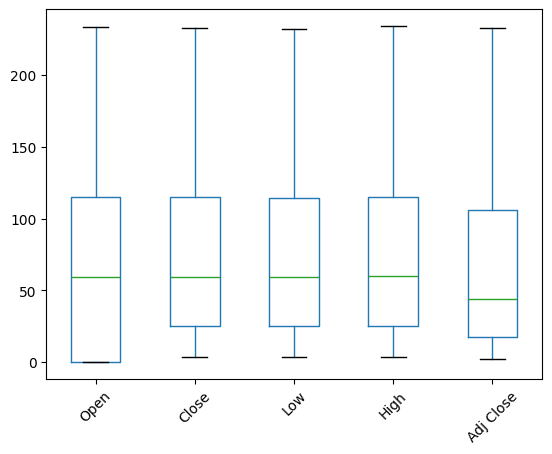

In [ ]:
# tính IQR
def remove_outliner(data):
    df_cleaned = data.copy()
    for column in np.array(data.columns):
        if column != 'Date':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            # Xác định ngưỡng ngoài box plot
            lower_bound = Q1 - 1.5*IQR
            update_bound = Q3 + 1.5*IQR
            df_cleaned = df_cleaned[(df_cleaned[column] > lower_bound) & (df_cleaned[column] < update_bound)]
    return df_cleaned
df = remove_outliner(df)

df.boxplot(column=['Open', 'Close', 'Low', 'High', 'Adj Close'], grid=False, rot=45, fontsize=10)

### check homogeneity test (kiểm định tính đồng nhất)

#### Levene's test

In [ ]:
def levene_test(df):
    df_cleaned = df.copy()
    columns = np.array(df_cleaned.columns)
    print("\nHomogeneity Test Results:")
    for i in range(1,len(columns)):
        if len(df_cleaned[columns[i]]) > 0:
            for j in range(i + 1, len(columns)):
                if len(df_cleaned[columns[j]]) > 0:
                    stat, p = stats.levene(df_cleaned[columns[i]], df_cleaned[columns[j]])
                    print(f"Levene test for: {columns[i]} and {columns[j]}: {p}", '(Homogeneous)' if p > 0.05 else '(Not Homogeneous)')

levene_test(df)


Homogeneity Test Results:
Levene test for: Adj Close and Close: 0.16977904017956147 (Homogeneous)
Levene test for: Adj Close and High: 0.06812016264038757 (Homogeneous)
Levene test for: Adj Close and Low: 0.4229694884749742 (Homogeneous)
Levene test for: Adj Close and Open: 5.886117020375673e-28 (Not Homogeneous)
Levene test for: Adj Close and Volume: 0.0 (Not Homogeneous)
Levene test for: Close and High: 0.6178447869754077 (Homogeneous)
Levene test for: Close and Low: 0.528307507448727 (Homogeneous)
Levene test for: Close and Open: 6.789907264434818e-26 (Not Homogeneous)
Levene test for: Close and Volume: 0.0 (Not Homogeneous)
Levene test for: High and Low: 0.25901393255272376 (Homogeneous)
Levene test for: High and Open: 1.5385711416768704e-23 (Not Homogeneous)
Levene test for: High and Volume: 0.0 (Not Homogeneous)
Levene test for: Low and Open: 5.795994549667424e-29 (Not Homogeneous)
Levene test for: Low and Volume: 0.0 (Not Homogeneous)
Levene test for: Open and Volume: 0.0 (Not 

#### Barlett's test

In [ ]:
def Barlett_test(df):
    df_cleaned = df.copy()
    columns = np.array(df_cleaned.columns)
    print("\nHomogeneity Test Results:")
    for i in range(1,len(columns)):
        if len(df_cleaned[columns[i]]) > 0:
            for j in range(i + 1, len(columns)):
                if len(df_cleaned[columns[j]]) > 0:
                    stat, p = stats.bartlett(df_cleaned[columns[i]], df_cleaned[columns[j]])
                    print(f"Barlett test for: {columns[i]} and {columns[j]}: {p}", '(Homogeneous)' if p > 0.05 else '(Not Homogeneous)')

Barlett_test(df)


Homogeneity Test Results:
Barlett test for: Adj Close and Close: 0.03993450019686793 (Not Homogeneous)
Barlett test for: Adj Close and High: 0.11979592649984079 (Homogeneous)
Barlett test for: Adj Close and Low: 0.007619532383971566 (Not Homogeneous)
Barlett test for: Adj Close and Open: 4.054363895010983e-12 (Not Homogeneous)
Barlett test for: Adj Close and Volume: 0.0 (Not Homogeneous)
Barlett test for: Close and High: 0.6178972273398724 (Homogeneous)
Barlett test for: Close and Low: 0.539126939463665 (Homogeneous)
Barlett test for: Close and Open: 2.5481989083085984e-19 (Not Homogeneous)
Barlett test for: Close and Volume: 0.0 (Not Homogeneous)
Barlett test for: High and Low: 0.26572628220234906 (Homogeneous)
Barlett test for: High and Open: 2.088863550739477e-17 (Not Homogeneous)
Barlett test for: High and Volume: 0.0 (Not Homogeneous)
Barlett test for: Low and Open: 8.028663929389163e-22 (Not Homogeneous)
Barlett test for: Low and Volume: 0.0 (Not Homogeneous)
Barlett test for: O

#### Fligner-Killeen Test

In [ ]:
def Fligner_test(df):
    df_cleaned = df.copy()
    columns = np.array(df_cleaned.columns)
    print("\nHomogeneity Test Results:")
    for i in range(1,len(columns)):
        if len(df_cleaned[columns[i]]) > 0:
            for j in range(i + 1, len(columns)):
                if len(df_cleaned[columns[j]]) > 0:
                    stat, p = stats.fligner(df_cleaned[columns[i]], df_cleaned[columns[j]])
                    print(f"Levene test for: {columns[i]} and {columns[j]}: {p}", '(Homogeneous)' if p > 0.05 else '(Not Homogeneous)')

Fligner_test(df)


Homogeneity Test Results:
Levene test for: Adj Close and Close: 0.0103587271193135 (Not Homogeneous)
Levene test for: Adj Close and High: 0.0033130725553992707 (Not Homogeneous)
Levene test for: Adj Close and Low: 0.03855453054231136 (Not Homogeneous)
Levene test for: Adj Close and Open: 9.144236453869765e-18 (Not Homogeneous)
Levene test for: Adj Close and Volume: 0.0 (Not Homogeneous)
Levene test for: Close and High: 0.4864168024109402 (Homogeneous)
Levene test for: Close and Low: 0.3114893443126726 (Homogeneous)
Levene test for: Close and Open: 1.1297733186805958e-45 (Not Homogeneous)
Levene test for: Close and Volume: 0.0 (Not Homogeneous)
Levene test for: High and Low: 0.0966856767989851 (Homogeneous)
Levene test for: High and Open: 7.08540716427017e-42 (Not Homogeneous)
Levene test for: High and Volume: 0.0 (Not Homogeneous)
Levene test for: Low and Open: 6.418096897538539e-49 (Not Homogeneous)
Levene test for: Low and Volume: 0.0 (Not Homogeneous)
Levene test for: Open and Volu

### Day Data

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])  # Chuyển về kiểu datetime
df.set_index("Date", inplace=True)  # Đặt Date làm index

# Đảm bảo dữ liệu có tần suất hàng ngày (nếu có missing date, chúng ta có thể điền giá trị)
df = df.asfreq("D")  # Tạo dãy thời gian liên tục theo ngày
df.fillna(method="ffill", inplace=True)  # Điền giá trị bị thiếu bằng giá trị trước đó (forward fill)

print(df.head())
df.describe()


            Adj Close     Close      High       Low      Open   Volume
Date                                                                  
1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000  41109.0
1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000   9343.0
1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606      0.0
1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000  10277.0
1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000   8409.0


<ipython-input-10-9b47ce5820b6>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Điền giá trị bị thiếu bằng giá trị trước đó (forward fill)


Adj Close         Close          High           Low          Open  \
count  16354.000000  16354.000000  16354.000000  16354.000000  16354.000000   
mean      63.716741     72.219598     72.620656     71.827266     68.118102   
std       52.102948     51.147239     51.395941     50.841628     55.728409   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.230645     27.556818     27.789255     27.556818      0.000000   
50%       50.976274     66.370003     66.800003     65.500000     66.000000   
75%      104.892240    114.339996    114.965000    113.842499    114.510002   
max      232.880005    232.880005    234.110001    231.830002    233.729996   

             Volume  
count   16354.00000  
mean   170869.78360  
std    190060.82848  
min         0.00000  
25%     13340.00000  
50%     89223.00000  
75%    285275.00000  
max    710300.00000

In [ ]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

### Week data

In [ ]:
# Gộp dữ liệu theo tuần và tính trung bình
data_weekly = df.resample("W").mean()

# Hiển thị kết quả
print(data_weekly.head())
data_weekly.describe()

            Adj Close     Close      High       Low      Open        Volume
Date                                                                       
1980-03-23   2.328809  3.337098  3.382969  3.337098  0.472087  12279.428571
1980-03-30   2.335477  3.346654  3.400170  3.346654  0.000000  22156.571429
1980-04-06   2.270122  3.253001  3.275937  3.253001  1.850121   1601.714286
1980-04-13   2.324807  3.331364  3.384880  3.331364  0.000000  43244.571429
1980-04-20   2.400834  3.440307  3.478533  3.440307  0.978576   9877.142857


Adj Close        Close         High          Low         Open  \
count  2337.000000  2337.000000  2337.000000  2337.000000  2337.000000   
mean     63.752570    72.252828    72.653833    71.860145    68.152316   
std      52.132869    51.169616    51.418752    50.863916    55.746815   
min       2.270122     3.253001     3.275937     3.253001     0.000000   
25%      19.228070    27.553129    27.892561    27.553129     0.981634   
50%      51.047897    66.370003    66.800003    65.660714    66.061429   
75%     104.548815   114.548570   115.220000   113.904287   114.538572   
max     230.970001   230.970001   233.360001   230.360001   233.360001   

              Volume  
count    2337.000000  
mean   170907.921694  
std    180600.040080  
min       105.000000  
25%     17114.285714  
50%     88257.142857  
75%    294971.428571  
max    692471.428571

### Month data

In [ ]:
# Gộp dữ liệu theo tháng và tính trung bình
data_monthly = df.resample("ME").mean()

# Hiển thị kết quả
data_monthly.describe()

Adj Close       Close        High         Low        Open  \
count  538.000000  538.000000  538.000000  538.000000  538.000000   
mean    63.705276   72.198048   72.599035   71.805680   68.099497   
std     52.164383   51.203417   51.454387   50.896756   55.776024   
min      2.331031    3.340283    3.390232    3.340283    0.000000   
25%     19.278916   27.625986   27.865054   27.625986    0.991644   
50%     51.014758   66.315524   66.613911   65.680484   66.054012   
75%    104.883167  114.474290  115.174667  113.772323  114.592166   
max    229.960668  229.960668  231.706666  228.925668  231.147334   

              Volume  
count     538.000000  
mean   170906.737252  
std    174962.598795  
min      1100.709677  
25%     19034.868548  
50%     87537.982719  
75%    302112.096774  
max    677200.000000

### year data

In [ ]:
# Gộp dữ liệu theo tuần và tính trung bình
data_yearly = df.resample("Y").mean()

# Hiển thị kết quả
data_yearly.describe()

<ipython-input-14-56a05177d410>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = df.resample("Y").mean()


Adj Close       Close        High         Low        Open  \
count   45.000000   45.000000   45.000000   45.000000   45.000000   
mean    63.490773   71.956323   72.355930   71.565549   67.861741   
std     52.250576   51.227615   51.480262   50.916387   55.846169   
min      2.718317    3.895249    3.924611    3.895249    0.000000   
25%     19.479205   27.912992   28.120863   27.912992    0.904619   
50%     46.714825   62.545808   62.855863   62.178274   62.500356   
75%    106.283048  114.906986  115.226055  114.534849  114.893288   
max    199.071225  199.071225  200.150167  198.002925  199.272841   

              Volume  
count      45.000000  
mean   170181.178919  
std    170052.736807  
min      5128.394521  
25%     21569.589041  
50%    113835.616438  
75%    295476.438356  
max    523293.442623

### Feature engine

#### Average moving

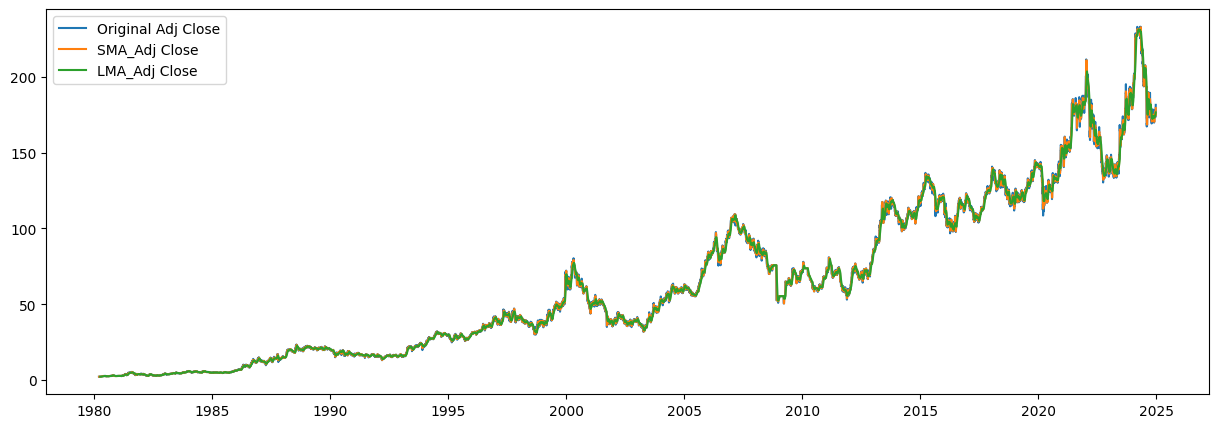

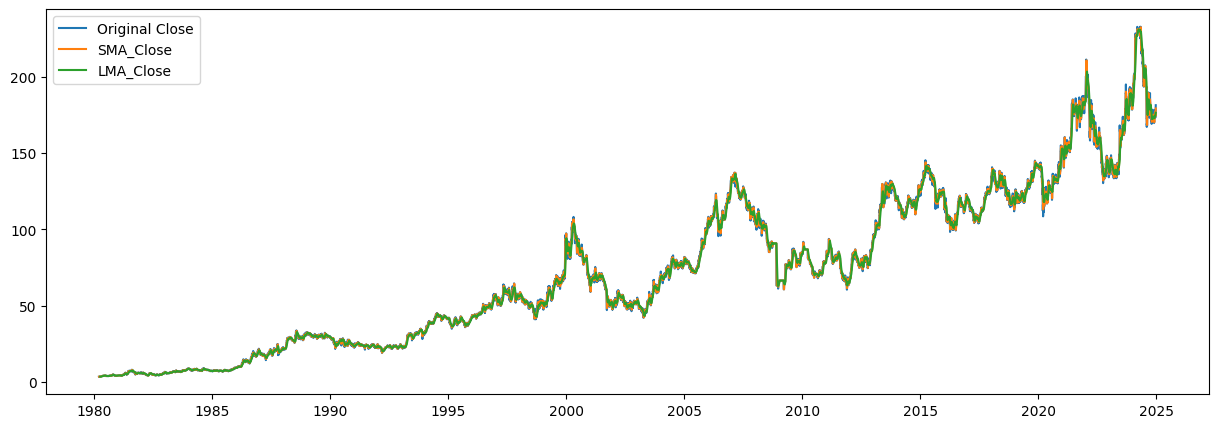

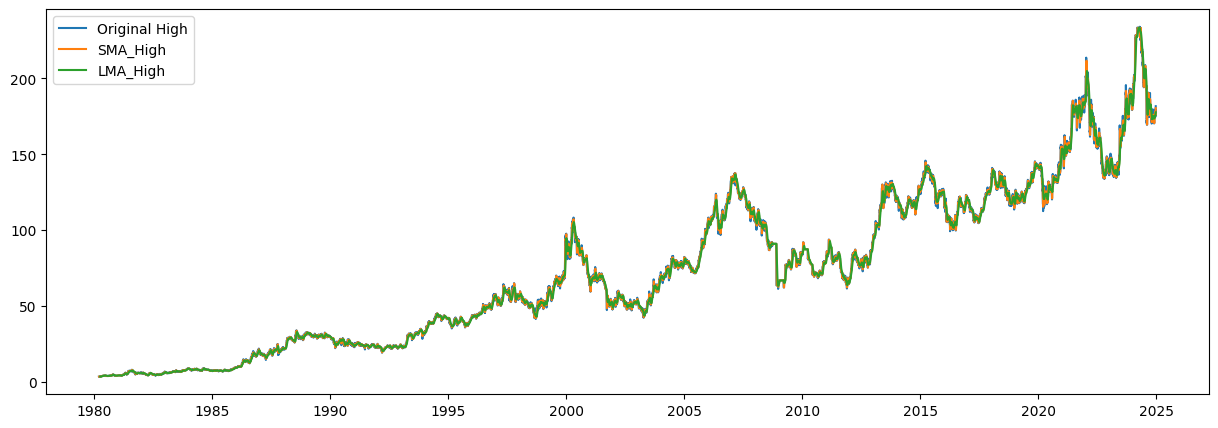

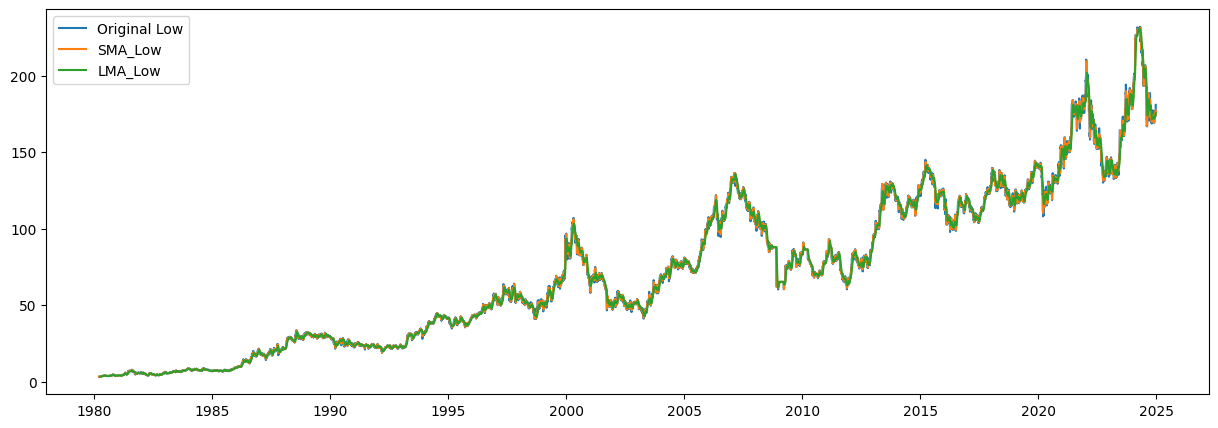

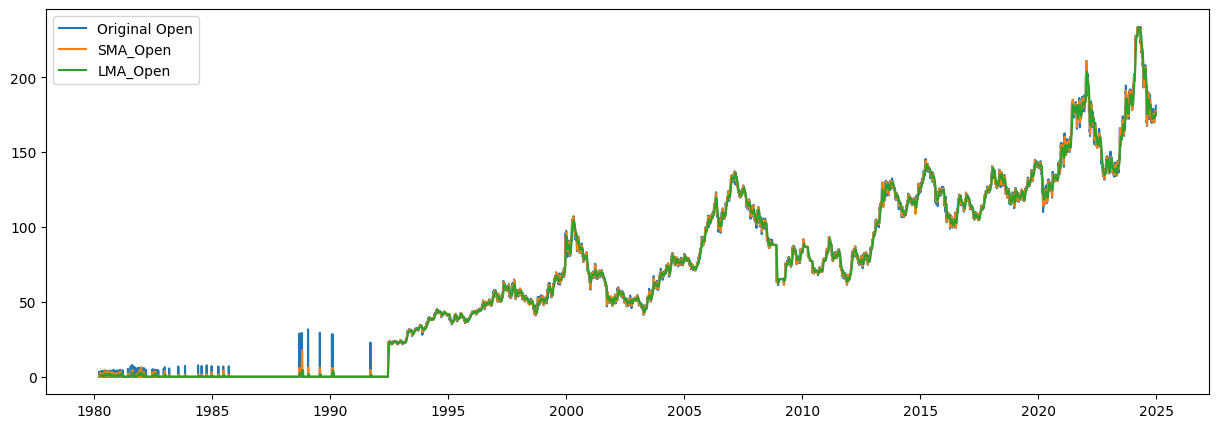

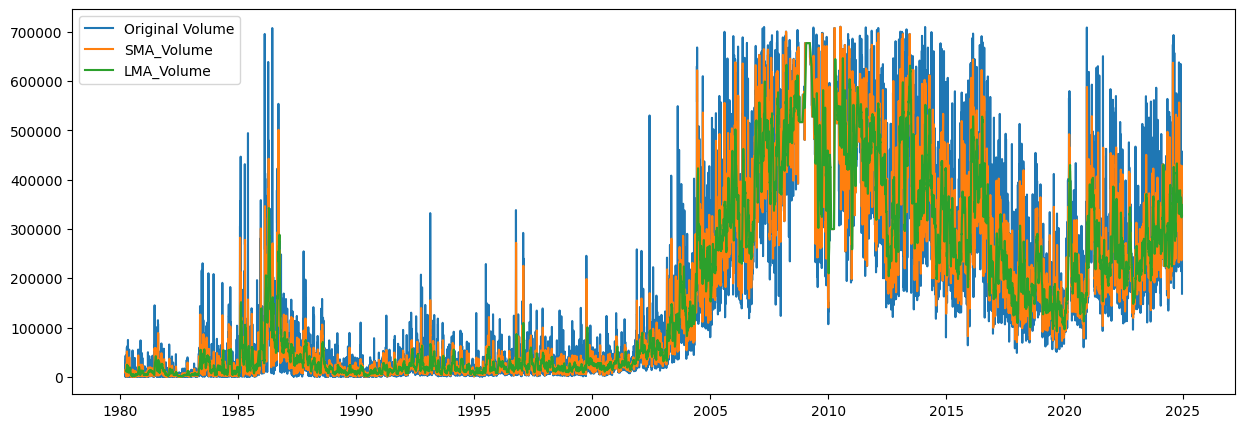

In [ ]:
def average_moving(data, short_window, long_window):
    df = data.copy()
    for column in df.columns:
        if column != 'Date':
            df['SMA_' + column] = df[column].rolling(window = short_window).mean()
            df['LMA_' + column] = df[column].rolling(window = long_window).mean()
    for column in df.columns:
        if column != 'Date' and 'SMA_' not in column and 'LMA_' not in column:
            plt.figure(figsize=(15, 5))
            plt.plot(df[column], label = 'Original ' + column)
            plt.plot(df['SMA_' + column], label = 'SMA_' + column)
            plt.plot(df['LMA_' + column], label = 'LMA_' + column)
            plt.legend()
            plt.show()
    return df
avg_df = average_moving(df, 5, 20)

In [ ]:
avg_df.describe()

Adj Close         Close          High           Low          Open  \
count  16354.000000  16354.000000  16354.000000  16354.000000  16354.000000   
mean      63.716741     72.219598     72.620656     71.827266     68.118102   
std       52.102948     51.147239     51.395941     50.841628     55.728409   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.230645     27.556818     27.789255     27.556818      0.000000   
50%       50.976274     66.370003     66.800003     65.500000     66.000000   
75%      104.892240    114.339996    114.965000    113.842499    114.510002   
max      232.880005    232.880005    234.110001    231.830002    233.729996   

             Volume  SMA_Adj Close  LMA_Adj Close     SMA_Close     LMA_Close  \
count   16354.00000   16350.000000   16335.000000  16350.000000  16335.000000   
mean   170869.78360      63.710010      63.686539     72.214825     72.198700   
std    190060.82848      52.081267      52.009219     51.124504     51.049654   
min         0.00000       2.259452       2.307068      3.237711      3.305944   
25%     13340.00000      19.248172      19.273682     27.568182     27.602853   
50%     89223.00000      50.961212      51.027078     66.370003     66.370003   
75%    285275.00000     104.810793     104.777254    114.421999    114.484749   
max    710300.00000     232.547995     231.063001    232.547995    231.063001   

           SMA_High      LMA_High       SMA_Low       LMA_Low      SMA_Open  \
count  16350.000000  16335.000000  16350.000000  16335.000000  16350.000000   
mean      72.615891     72.599417     71.822603     71.806588     68.112804   
std       51.373806     51.298822     50.819501     50.744738     55.703704   
min        3.248414      3.346081      3.237711      3.305944      0.000000   
25%       27.820965     27.816222     27.568182     27.602853      0.985883   
50%       66.800003     66.800003     65.501000     65.534375     66.019997   
75%      115.071000    115.040250    113.794002    113.771751    114.483499   
max      233.510001    233.397501    231.270001    230.427000    233.434000   

           LMA_Open     SMA_Volume     LMA_Volume  
count  16335.000000   16350.000000   16335.000000  
mean      68.094356  170869.723095  170860.288901  
std       55.634804  182176.832157  176054.181381  
min        0.000000       0.000000     492.650000  
25%        1.143750   16568.450000   18541.475000  
50%       65.973499   88765.900000   91250.300000  
75%      114.511749  290990.000000  295732.500000  
max      233.378500  710300.000000  677200.000000

In [ ]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

#### Volatility

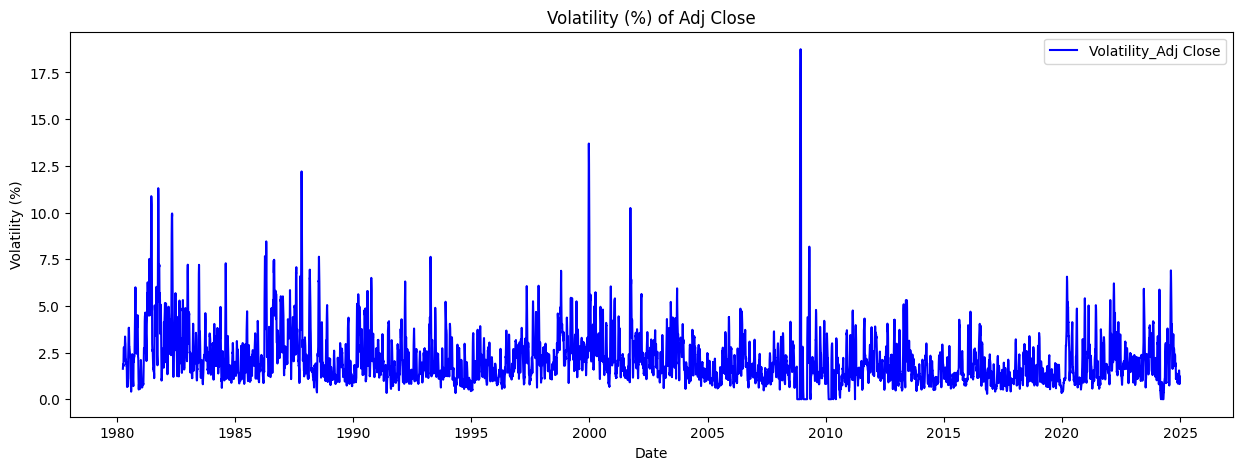

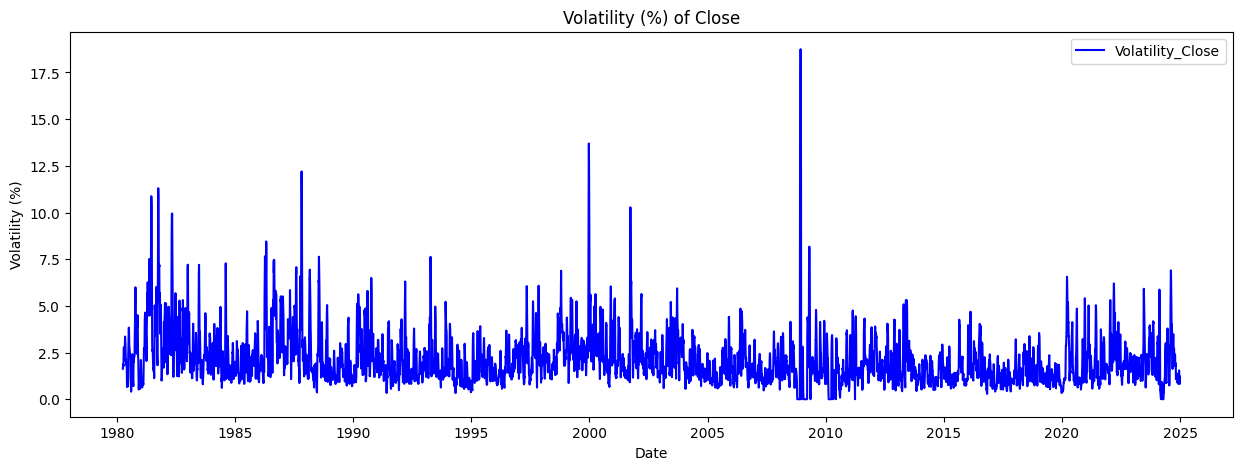

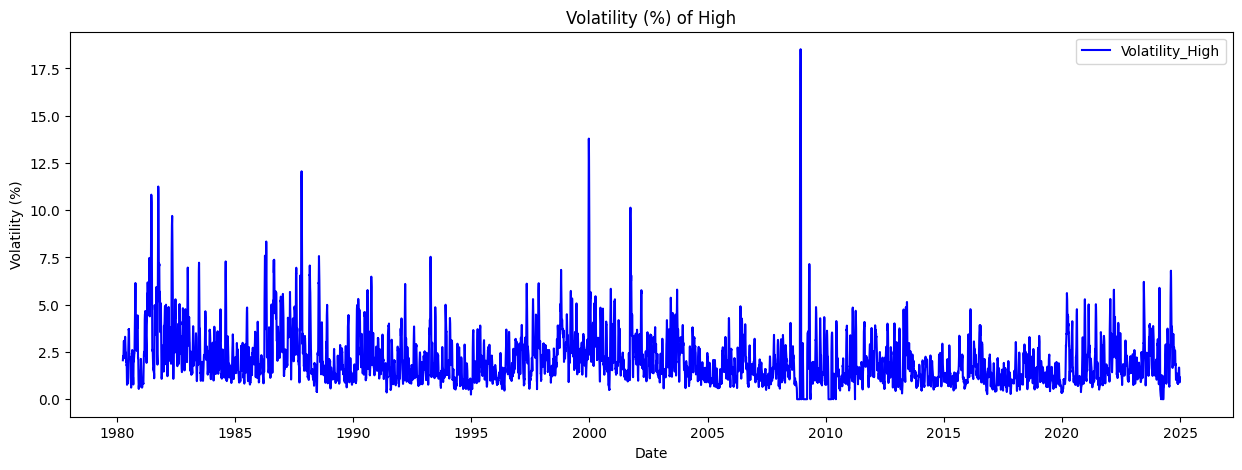

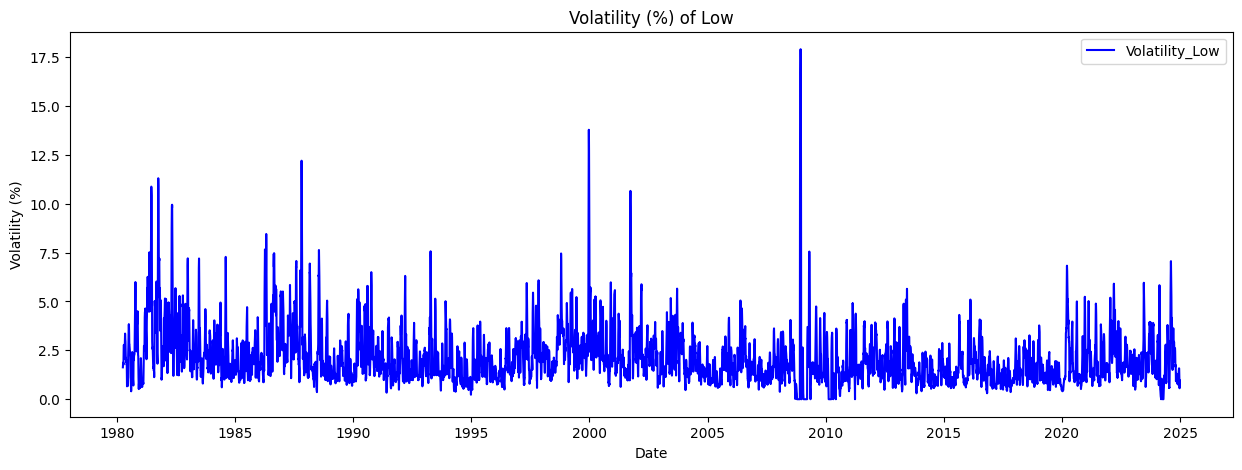

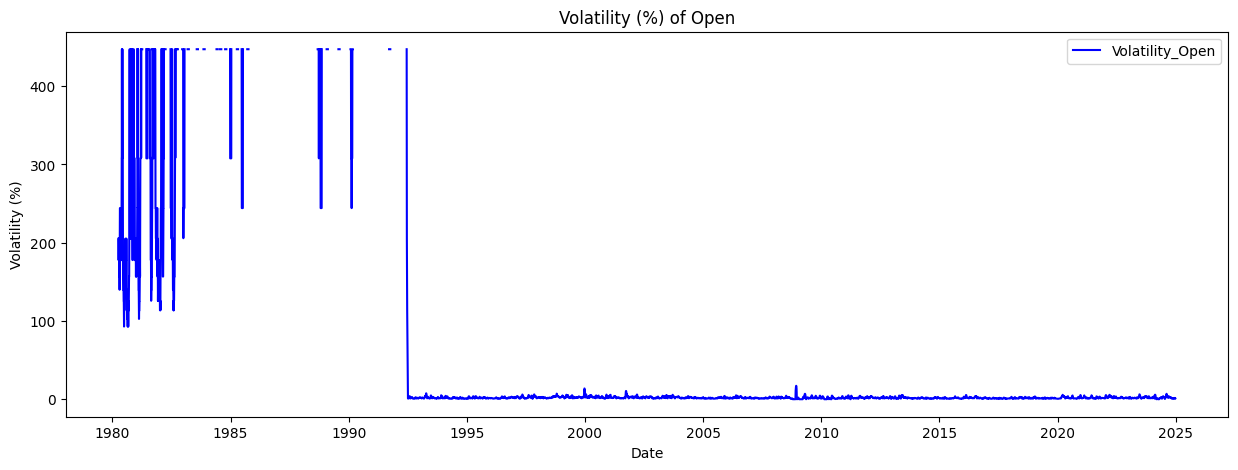

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def volatility(data, window):
    df = data.copy()

    # Kiểm tra xem 'Volume' có trong cột không trước khi loại bỏ
    original_columns = list(df.columns)
    if 'Volume' in original_columns:
        original_columns.remove('Volume')  # Bỏ 'Volume' vì không cần thiết

    # Tính độ biến động (Volatility)
    for column in original_columns:
        rolling_std = df[column].rolling(window=window).std()
        rolling_mean = df[column].rolling(window=window).mean()
        df[f'Volatility_{column}'] = (rolling_std / rolling_mean) * 100  # Tính theo %

    # Vẽ đồ thị volatility
    for column in original_columns:
        volatility_col = f'Volatility_{column}'
        if volatility_col in df.columns:
            plt.figure(figsize=(15, 5))
            plt.plot(df.index, df[volatility_col], label=volatility_col, color='b')
            plt.ylabel("Volatility (%)")
            plt.xlabel("Date")
            plt.title(f"Volatility (%) of {column}")
            plt.legend()  # Thêm chú thích
            plt.show()

    return df

volatility_df = volatility(df, 20)


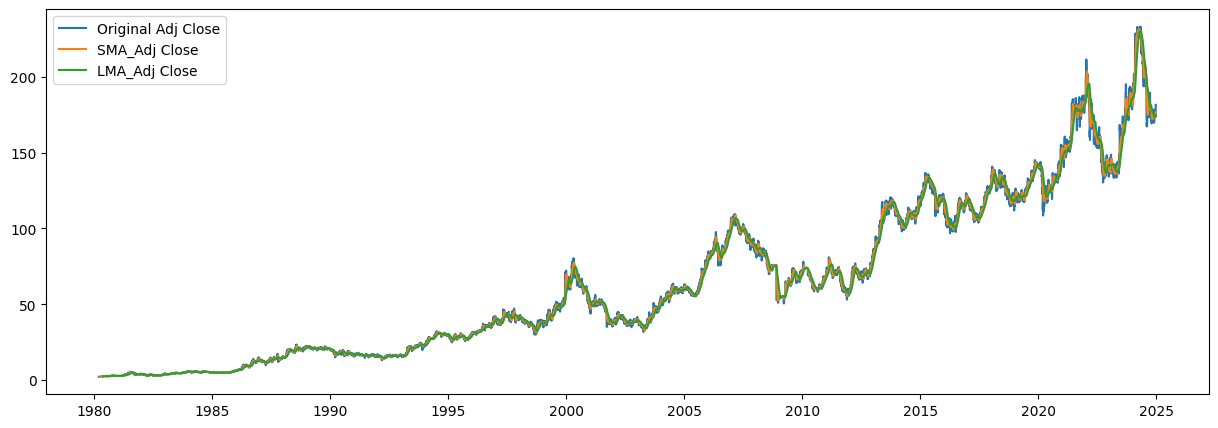

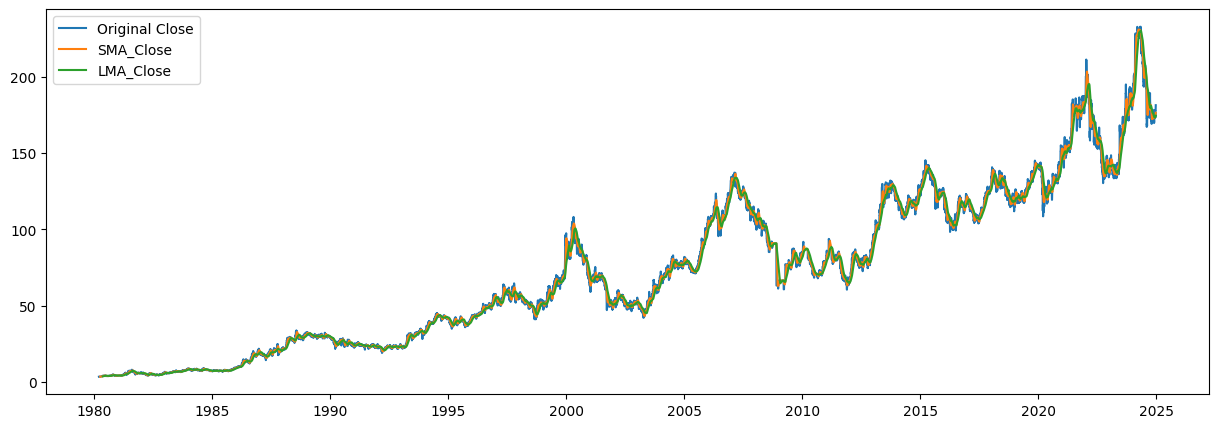

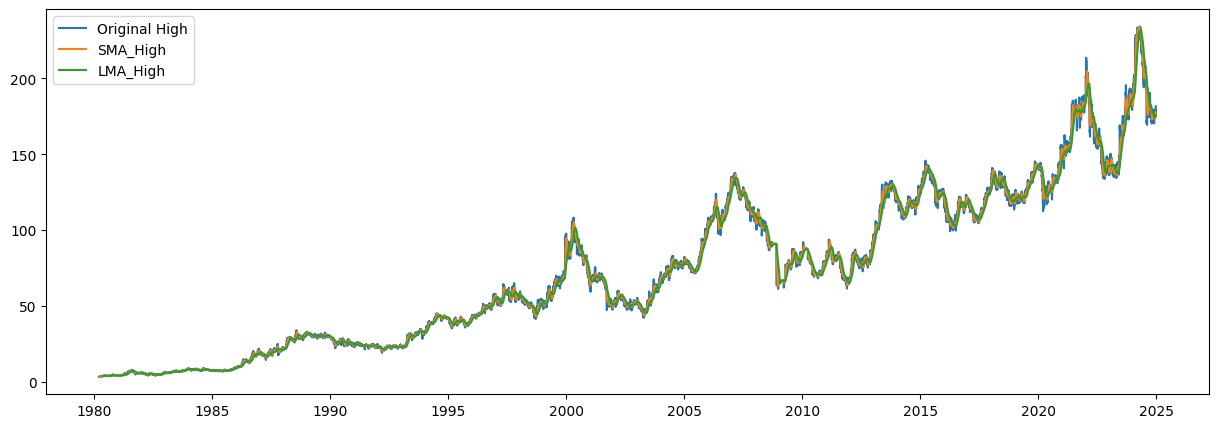

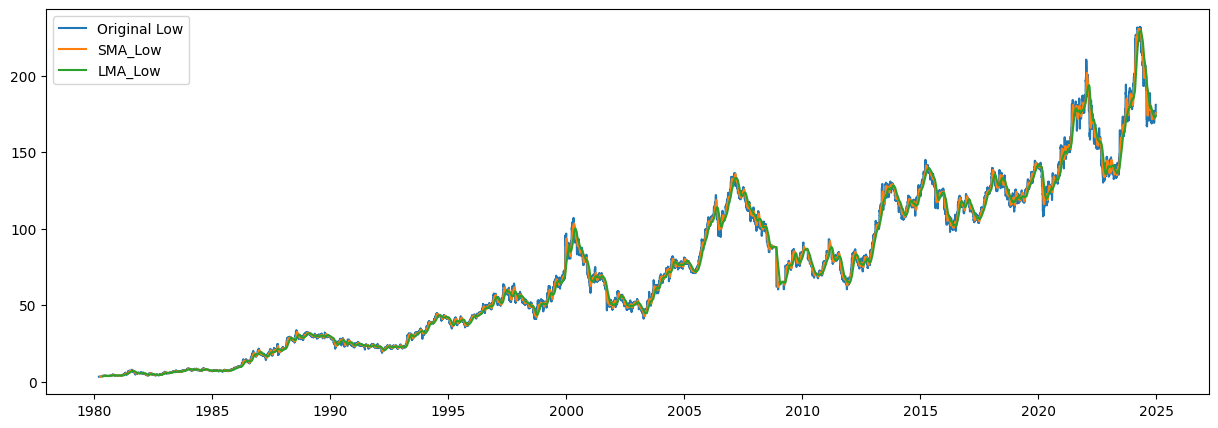

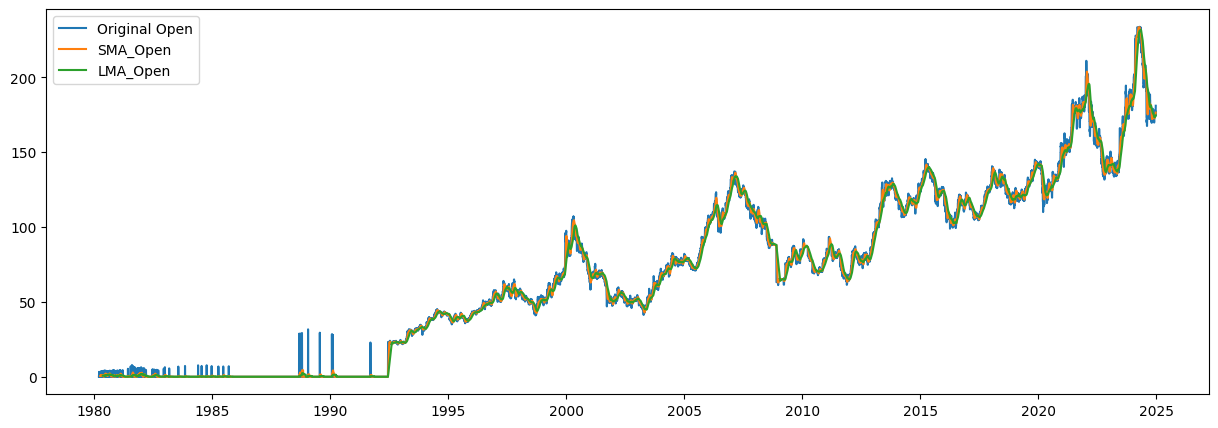

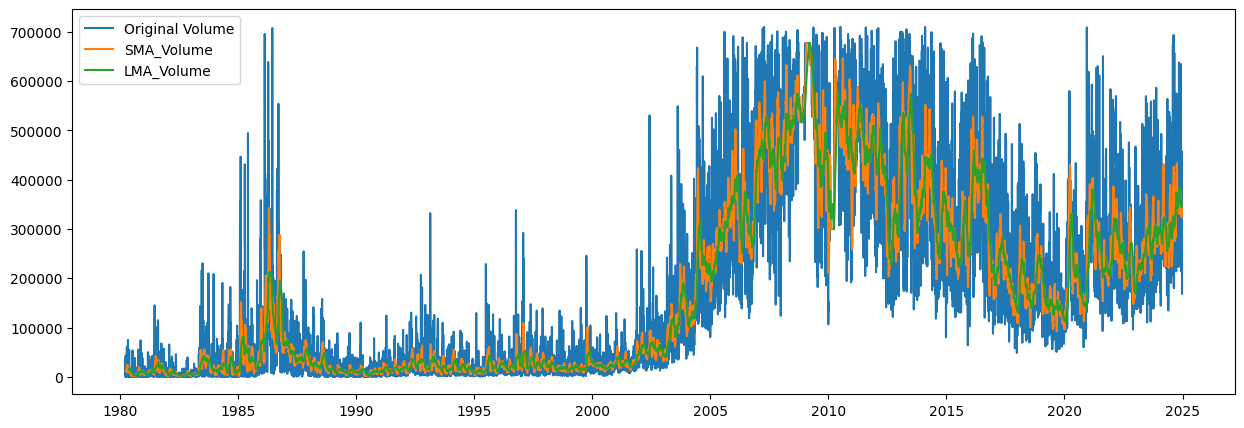

In [ ]:
avg_df = average_moving(df, 20, 60)

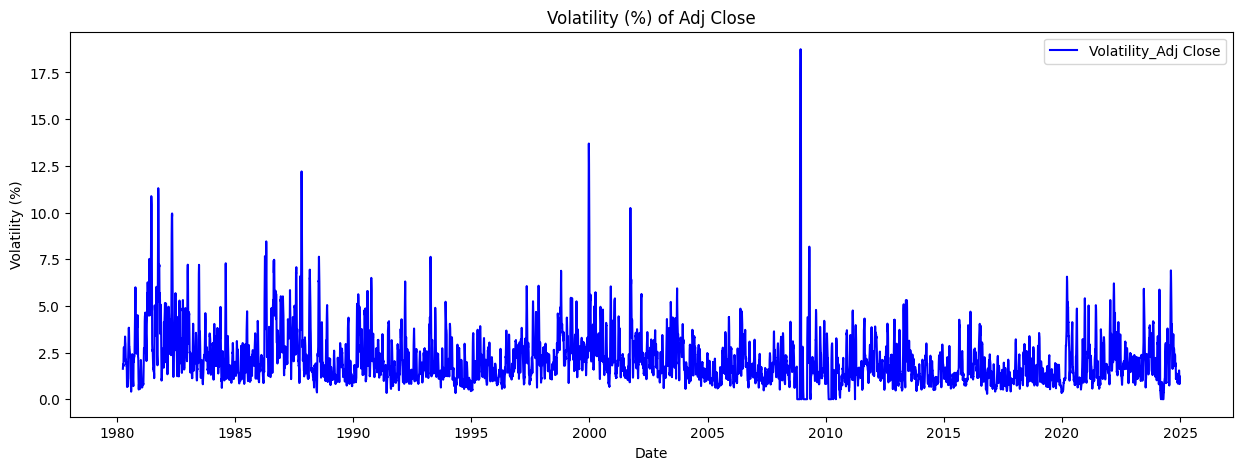

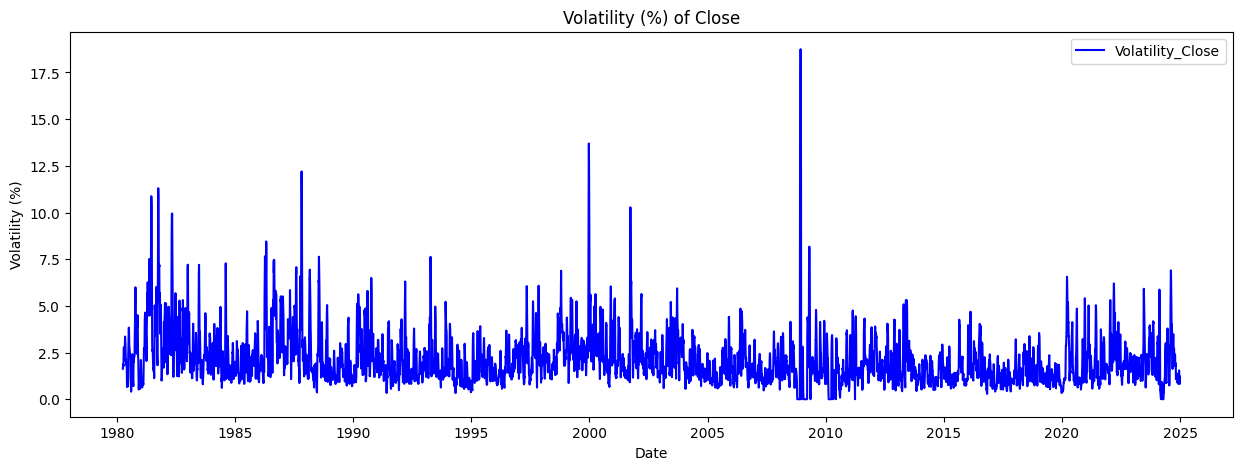

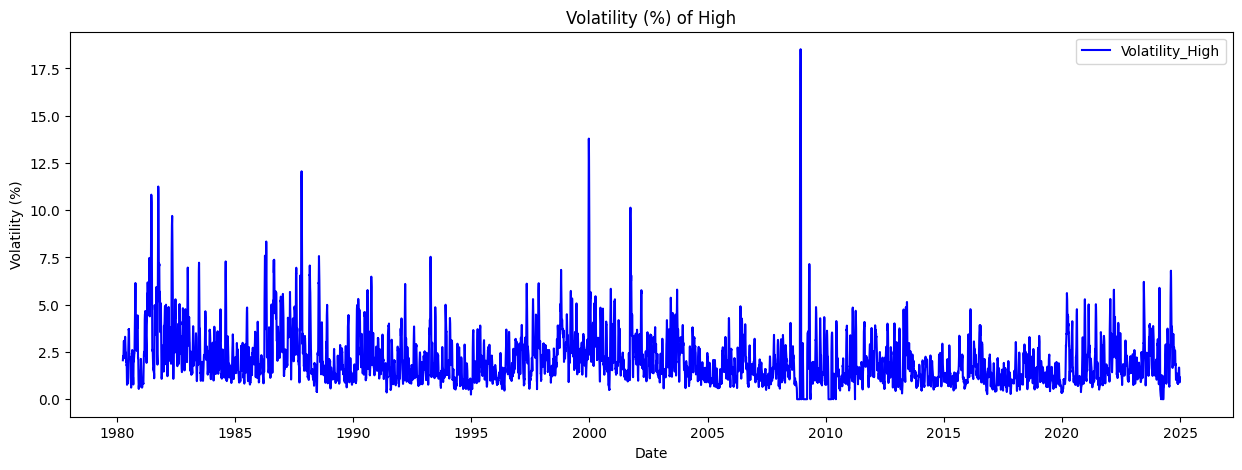

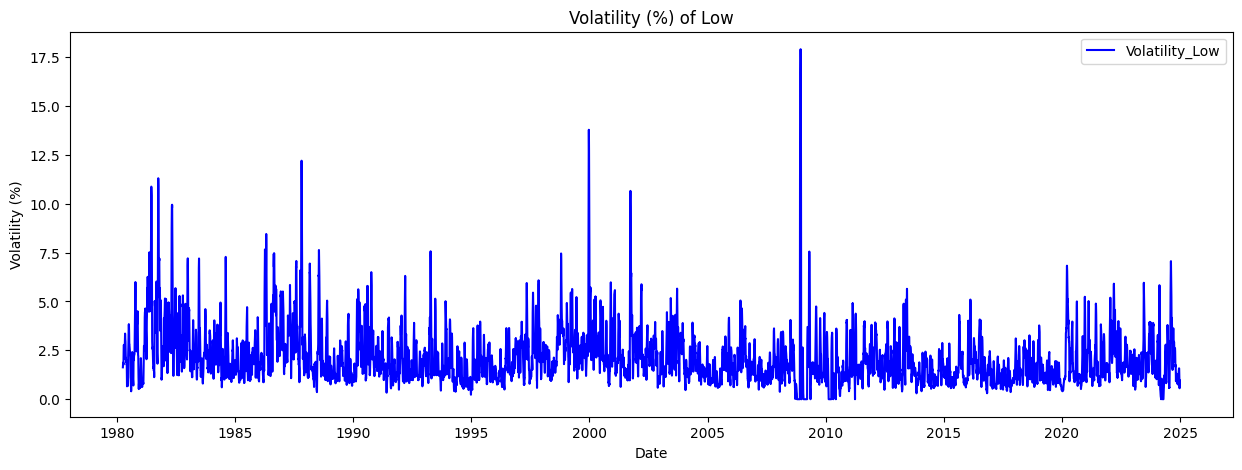

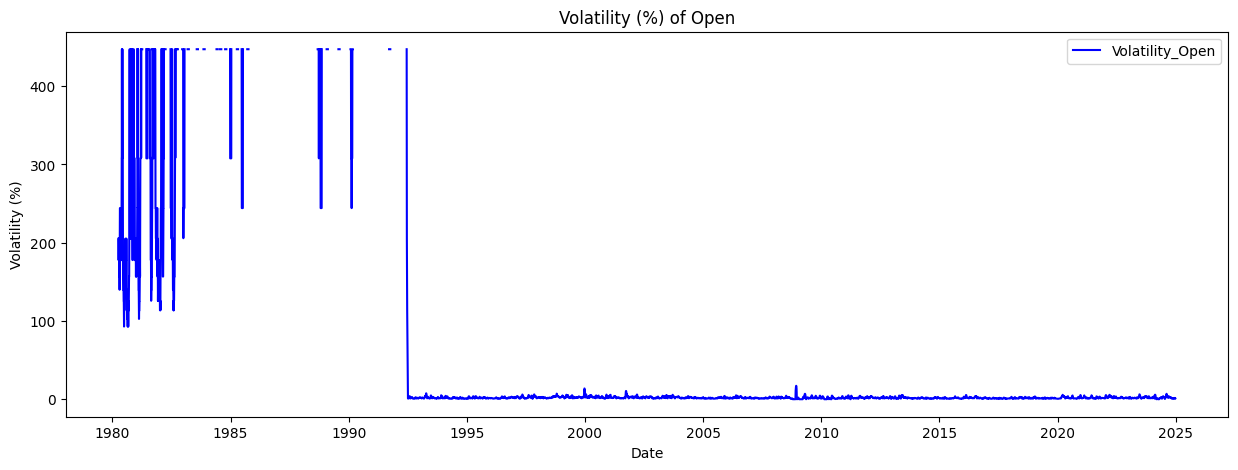

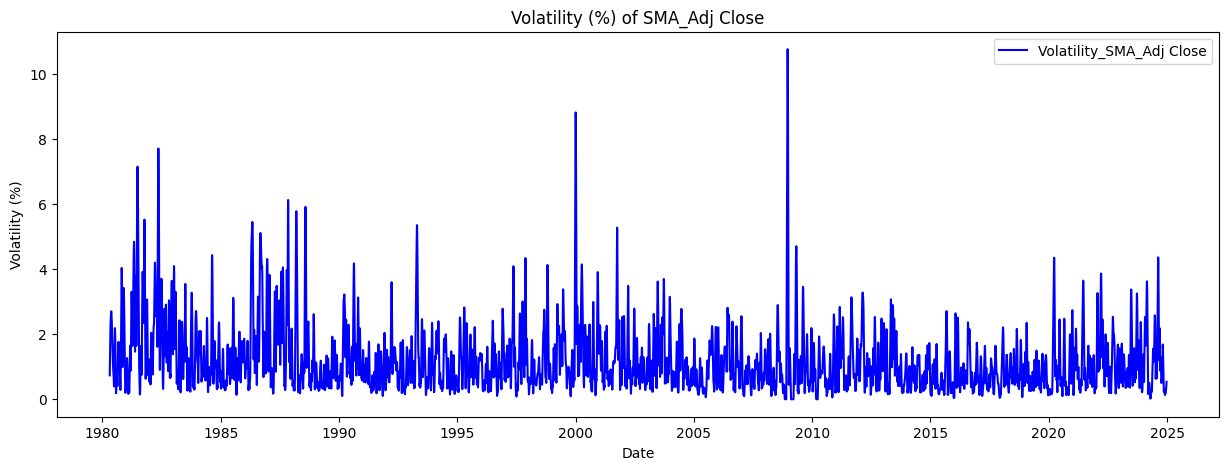

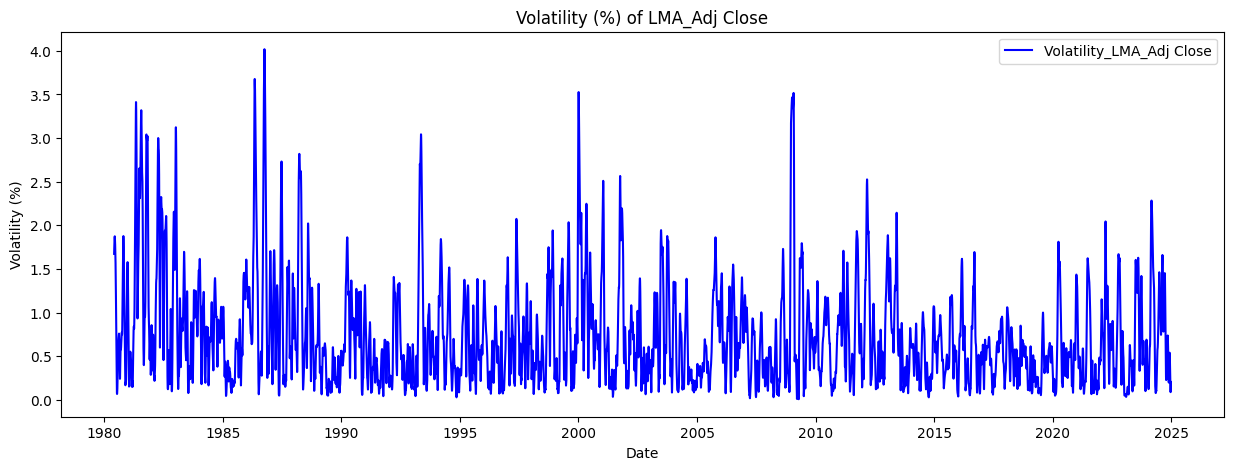

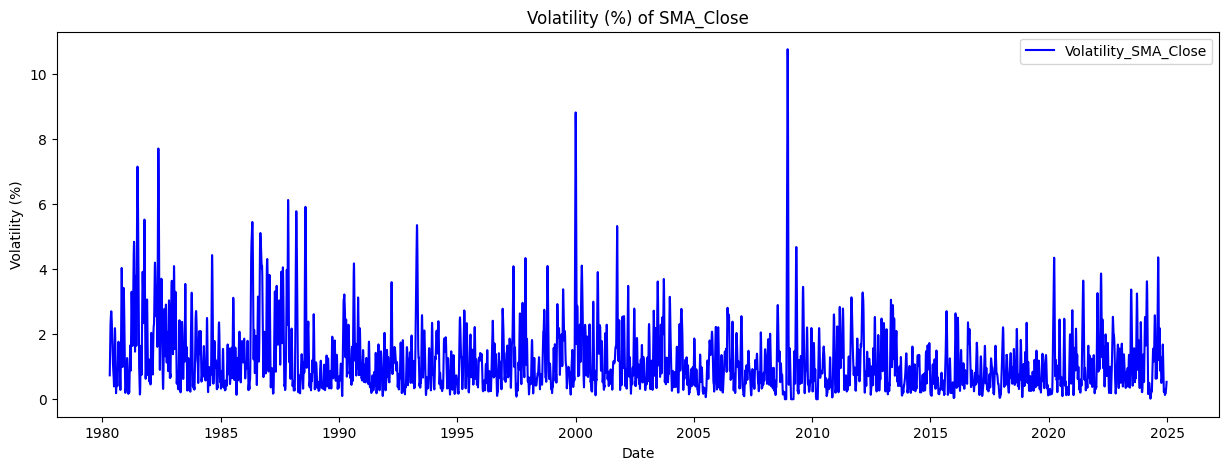

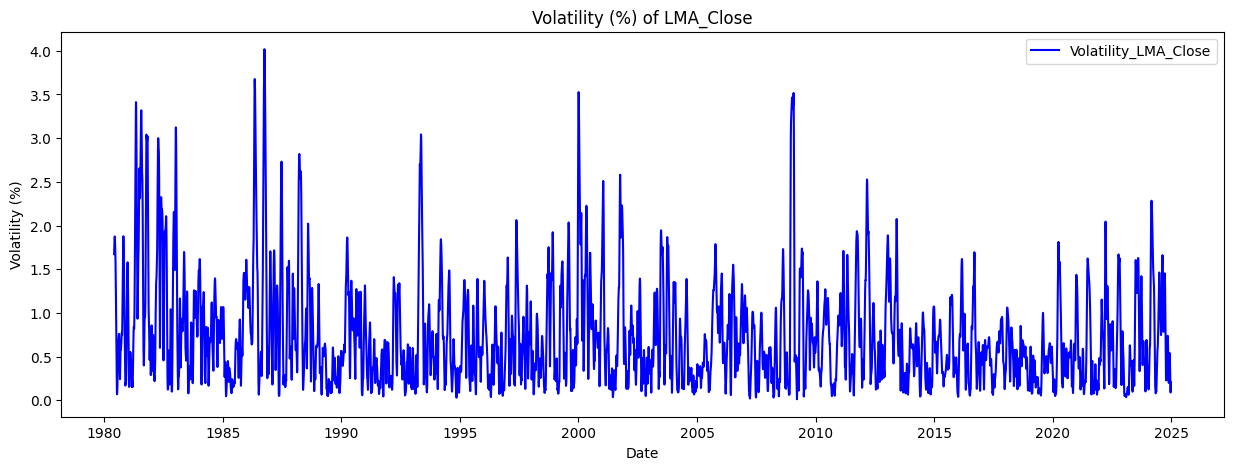

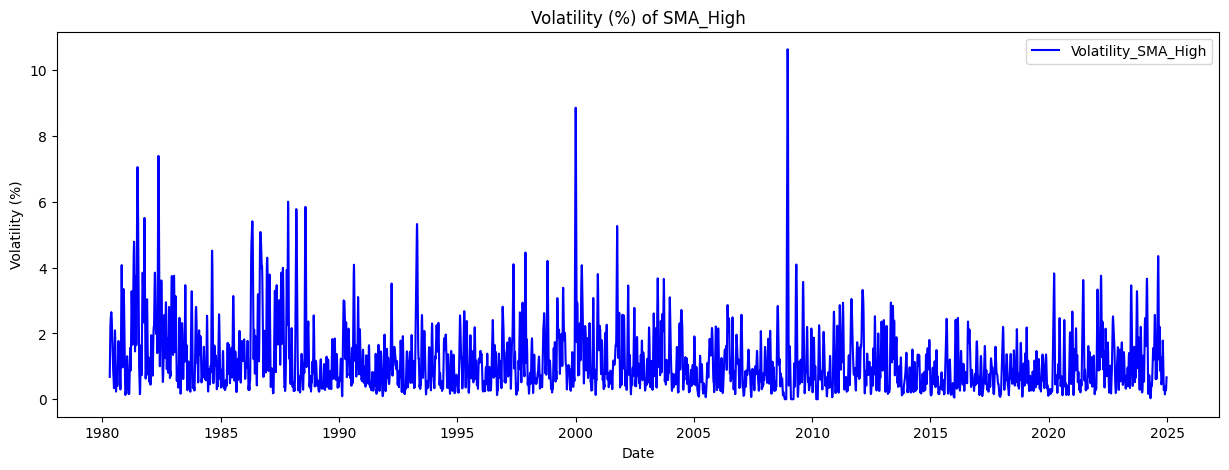

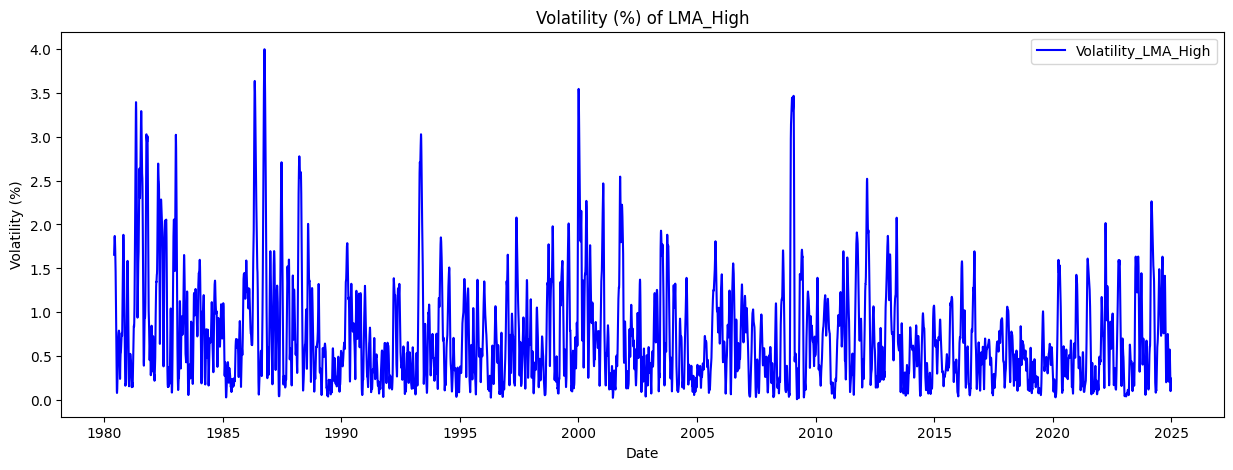

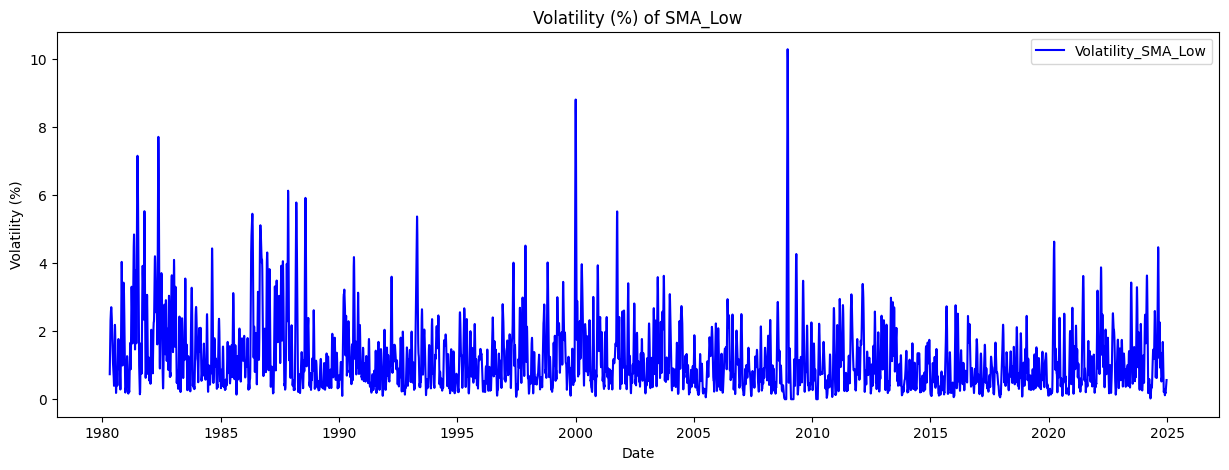

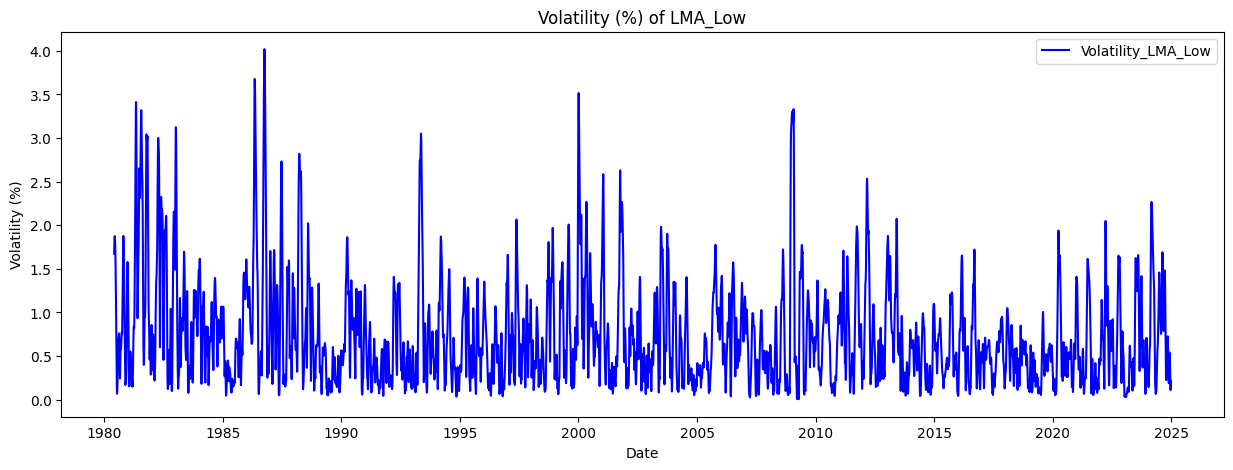

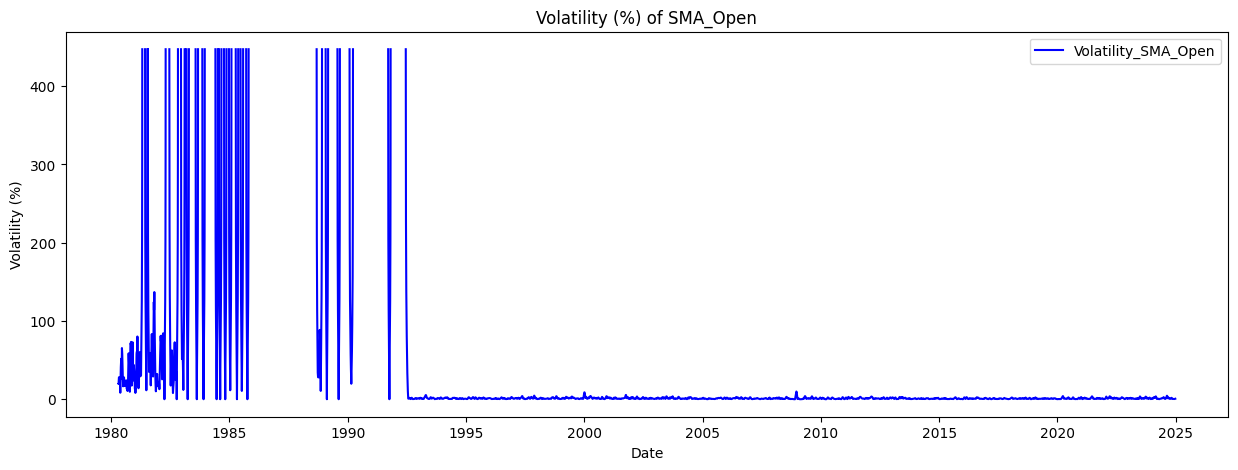

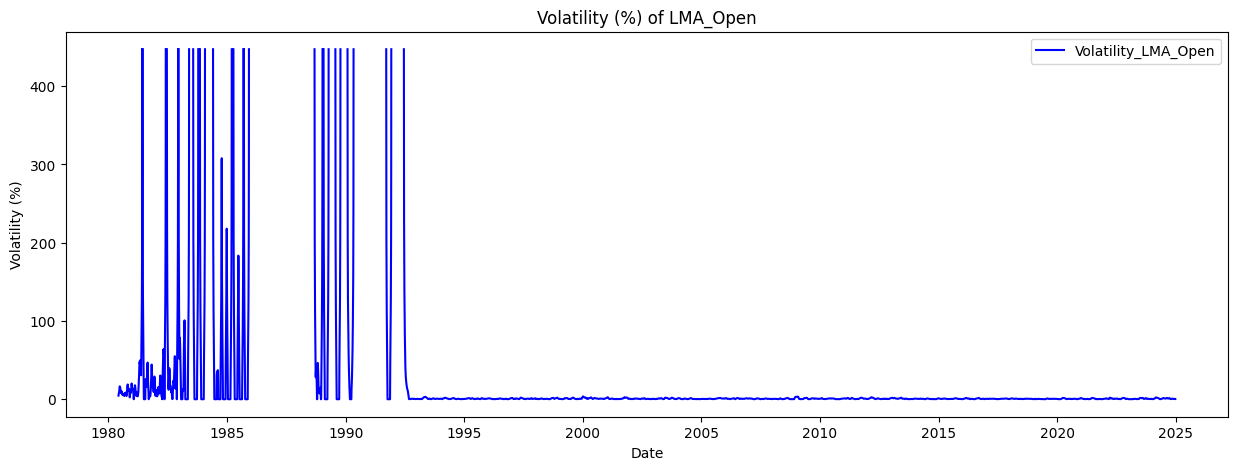

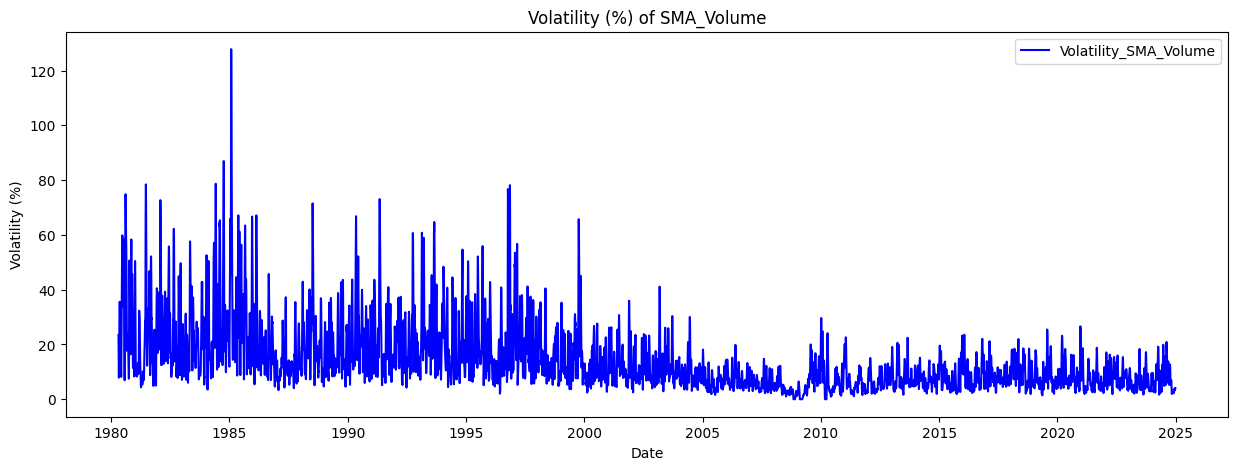

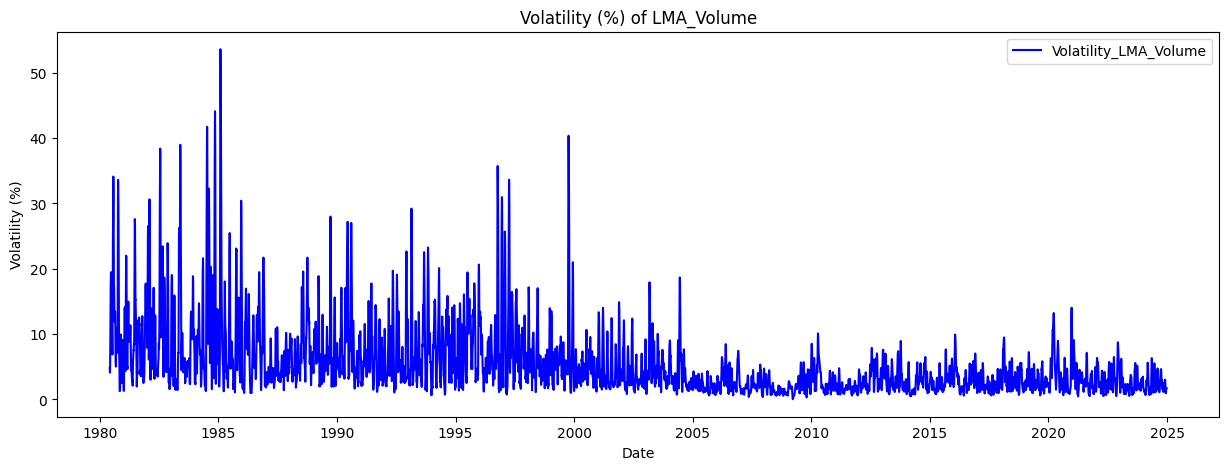

In [ ]:
volatility_df =volatility(avg_df, 20)

###### Tài sản ít biến động (Low Volatility):

###### 0% - 1% (đối với cổ phiếu lớn, trái phiếu, chỉ số chứng khoán)
###### 1% - 2% (đối với tiền tệ, vàng)
###### < 5% (đối với giá sản phẩm tiêu dùng, hàng hóa)
###### Tài sản có độ biến động trung bình (Moderate Volatility):

###### 5% - 10% (cổ phiếu tăng trưởng, thị trường tiền điện tử ổn định)
###### 10% - 20% (giá dầu, hàng hóa, thị trường bất ổn)
###### Tài sản có độ biến động cao (High Volatility):

###### > 20% (crypto như Bitcoin, meme stocks như GameStop)
###### > 50% (các cổ phiếu nhỏ hoặc sự kiện tài chính bất thường)
###### 📌 Lưu ý: Volatility được tính theo một khoảng thời gian (window), ví dụ 20 ngày, 50 ngày, 100 ngày. Window càng lớn thì volatility càng mượt và ít dao động hơn.



#### RSI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def cal_RSI(data, window=14):
    df = data.copy()

    for column in df.columns:
        if column != 'Volume':  # Không tính RSI cho 'Volume'
            delta = df[column].diff(1)

            gain = delta.where(delta > 0, 0)  # Chỉ giữ giá trị dương
            loss = -delta.where(delta < 0, 0)  # Chỉ giữ giá trị âm (đảo dấu để dương)

            avg_gain = gain.rolling(window=window, min_periods=1).mean()
            avg_loss = loss.rolling(window=window, min_periods=1).mean()

            rs = avg_gain / avg_loss
            rsi = 100 - (100 / (1 + rs))

            df[f"RSI_{column}"] = rsi

    # Vẽ RSI
    rsi_columns = [col for col in df.columns if col.startswith('RSI_')]
    for column in rsi_columns:
        plt.figure(figsize=(15, 5))
        plt.plot(df.index, df[column], label=column, color='blue')
        plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
        plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

        plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Hiển thị theo năm
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Chỉ hiển thị năm
        plt.gcf().autofmt_xdate()  # Xoay nhãn thời gian để dễ đọc

        plt.legend()
        plt.title(f'RSI Indicator for {column.replace("RSI_", "")}')
        plt.show()

    return df


##### RSI in Day

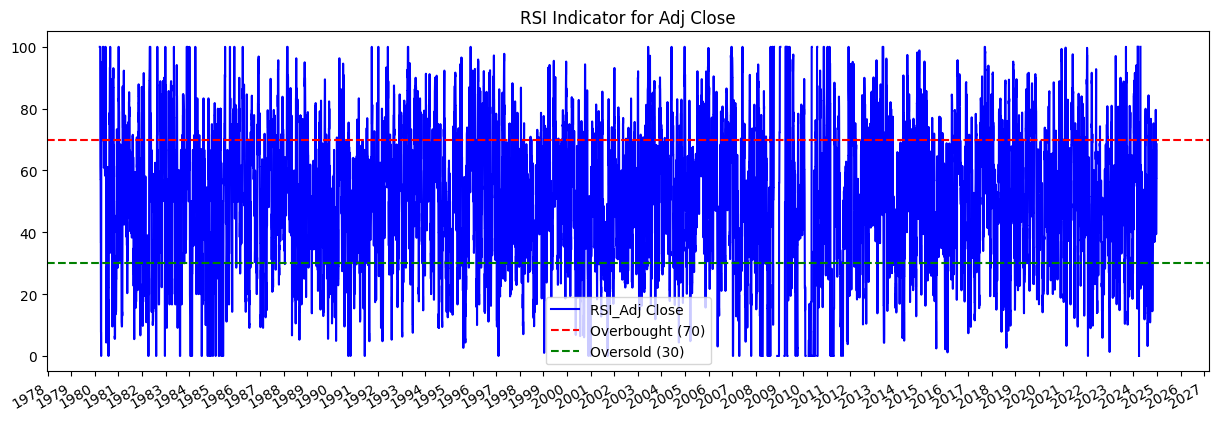

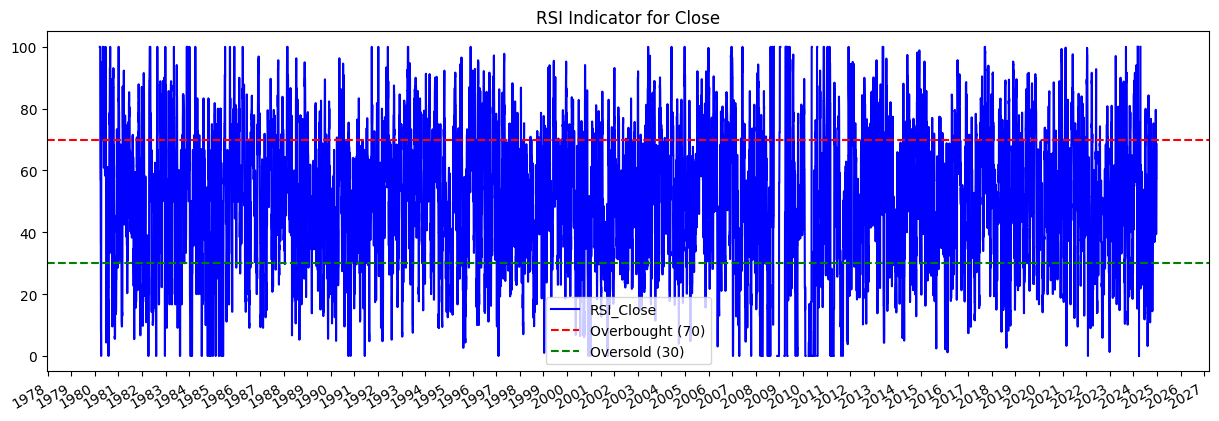

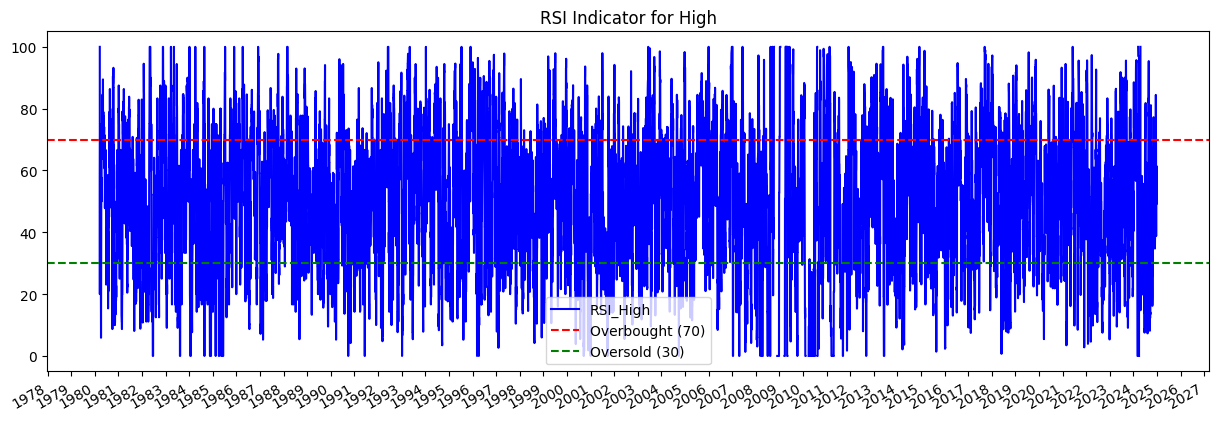

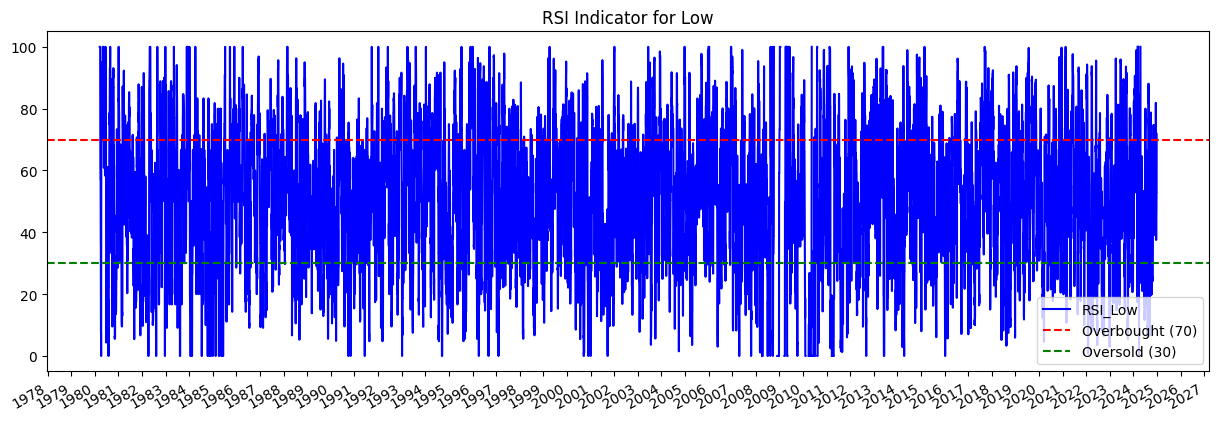

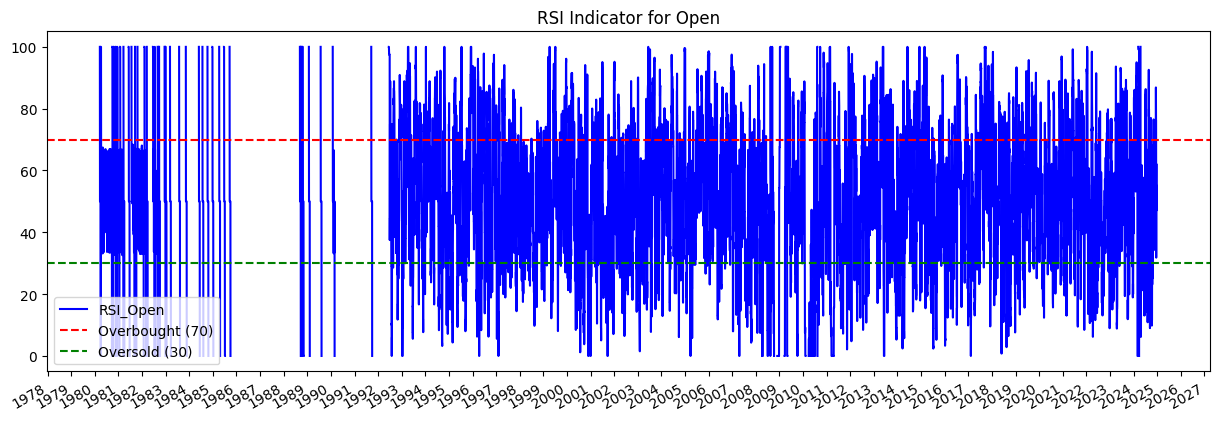

In [ ]:
df_rsi = cal_RSI(df, 14)

##### RSI in Week

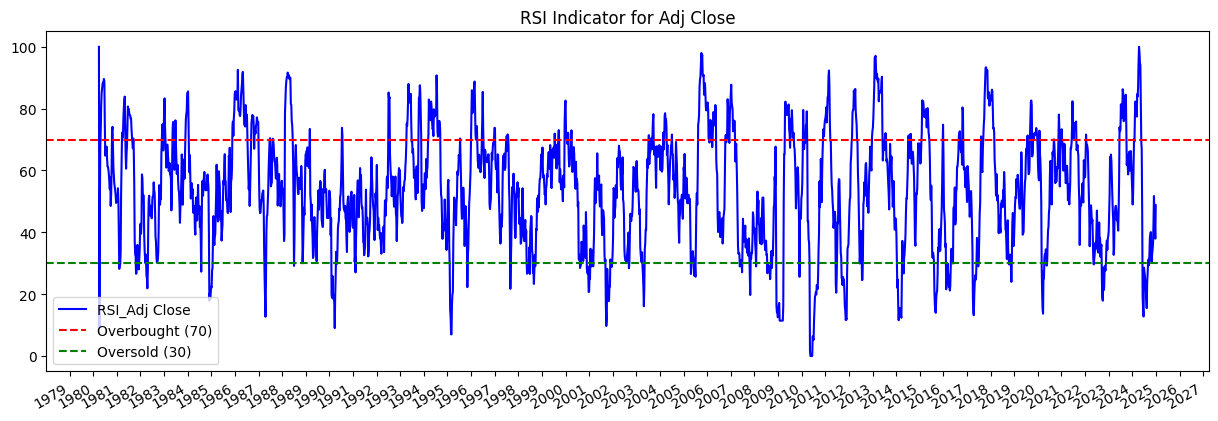

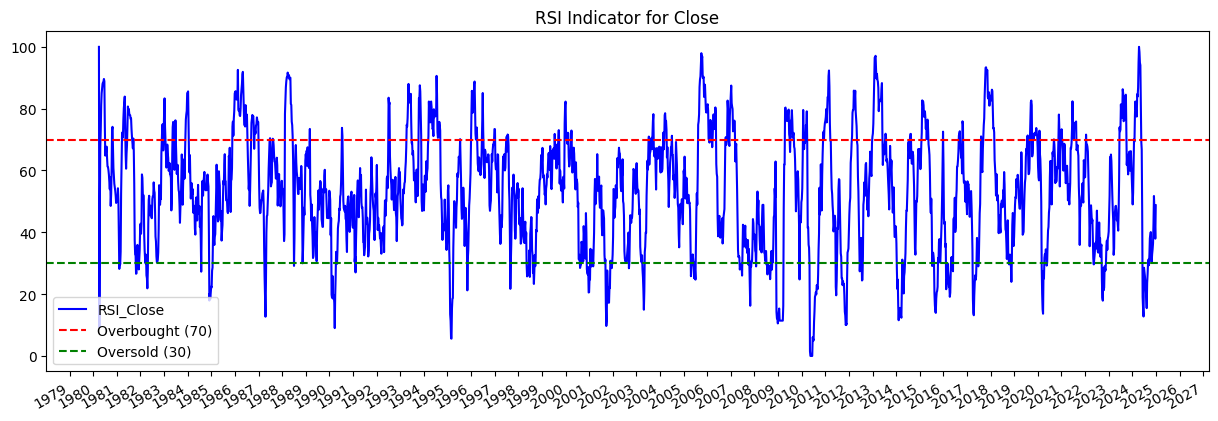

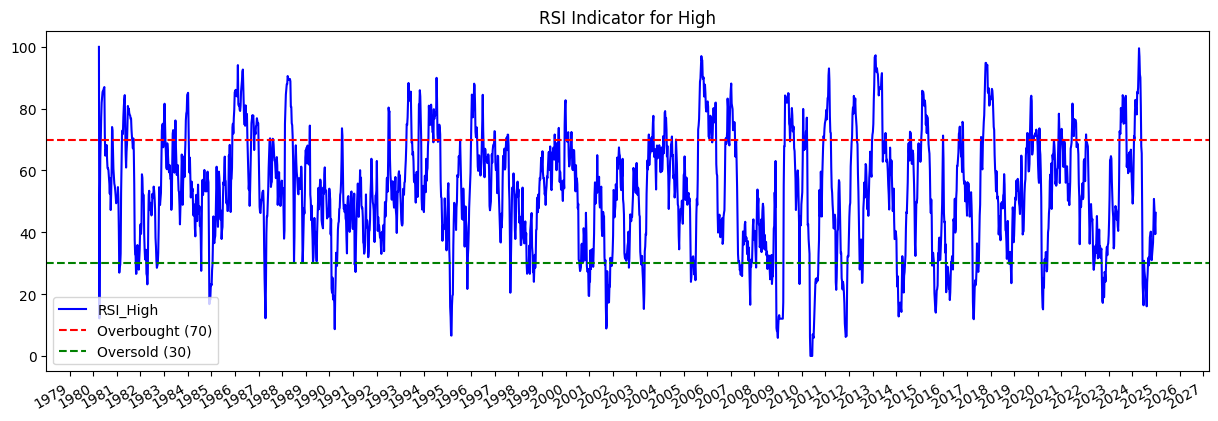

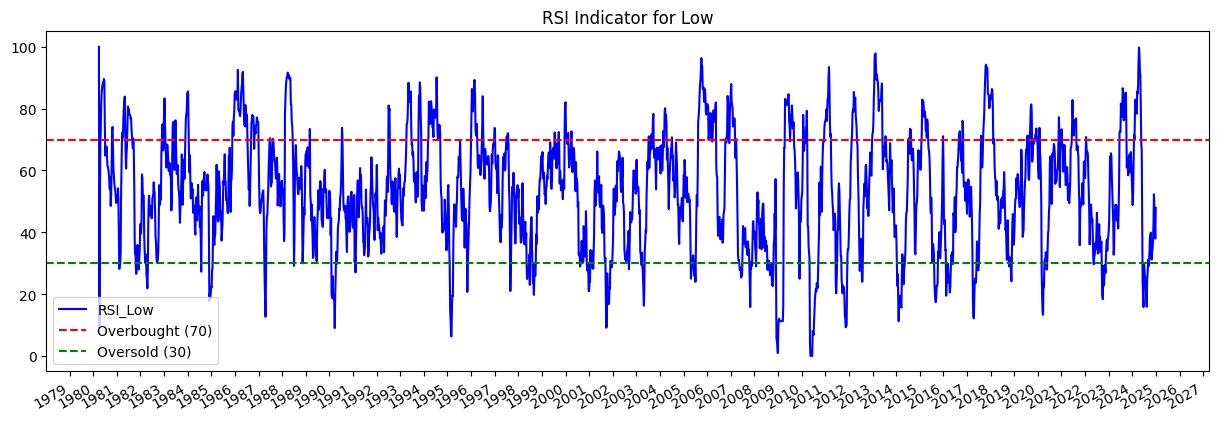

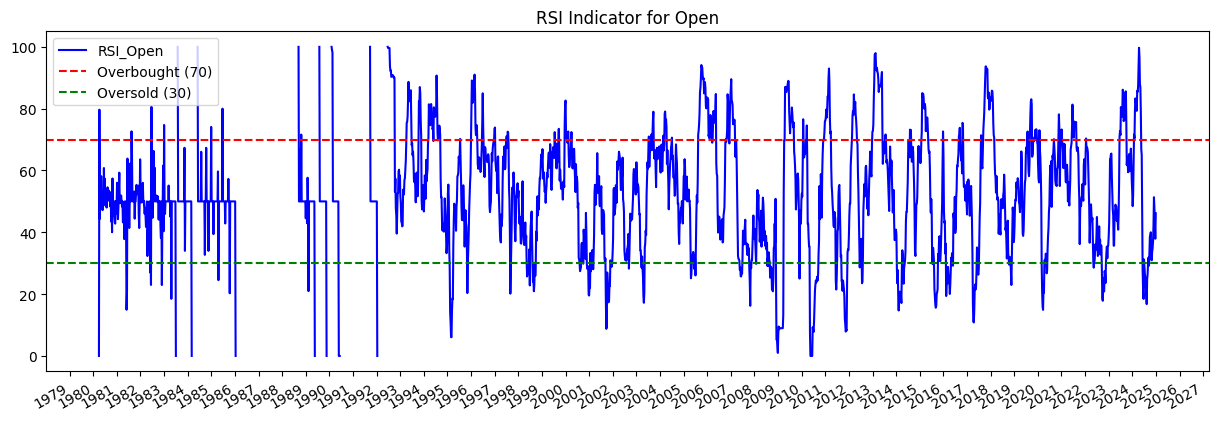

In [ ]:
df_rsi_w = cal_RSI(data_weekly, 16)

##### RSI in month

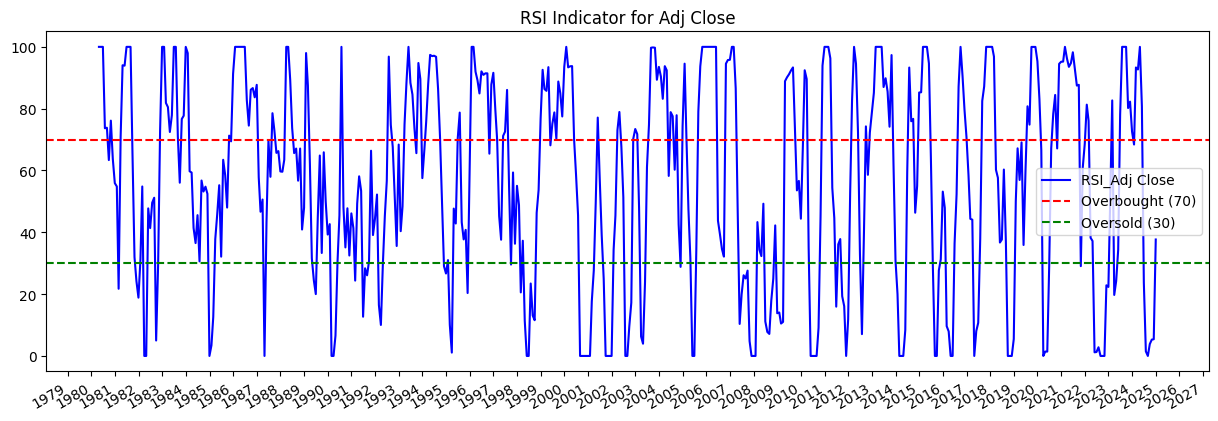

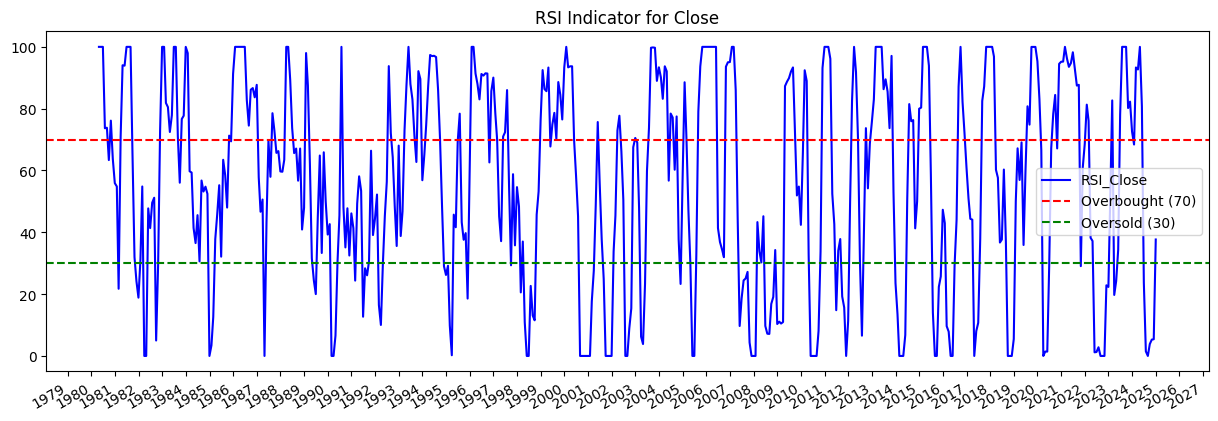

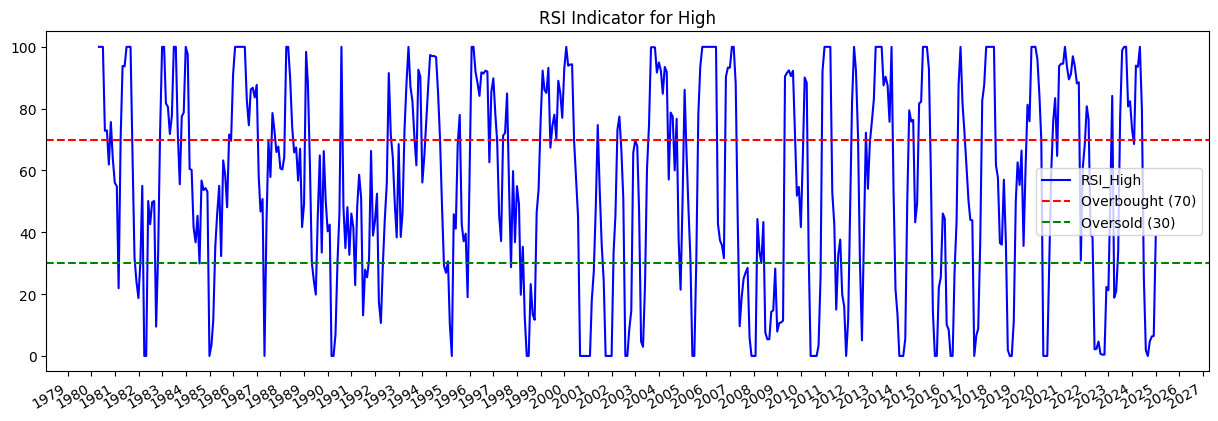

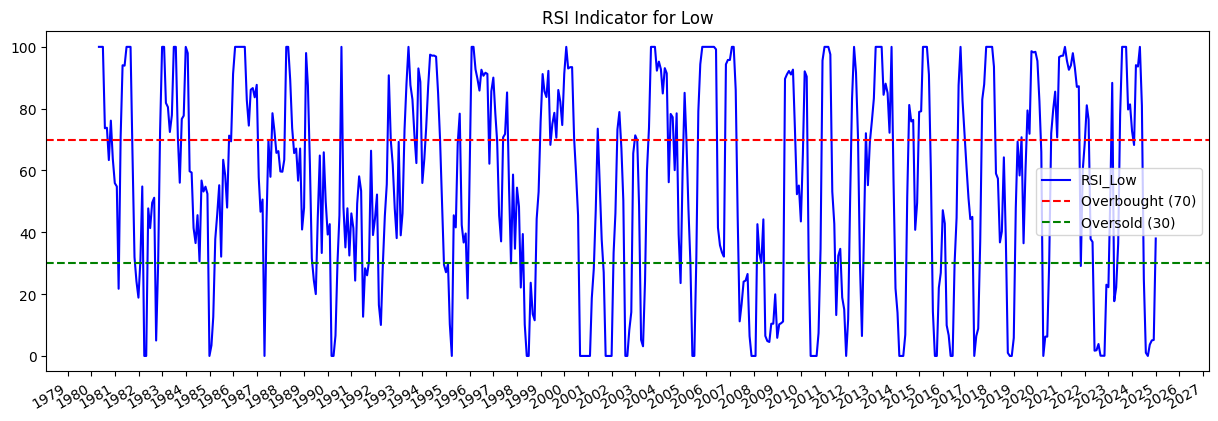

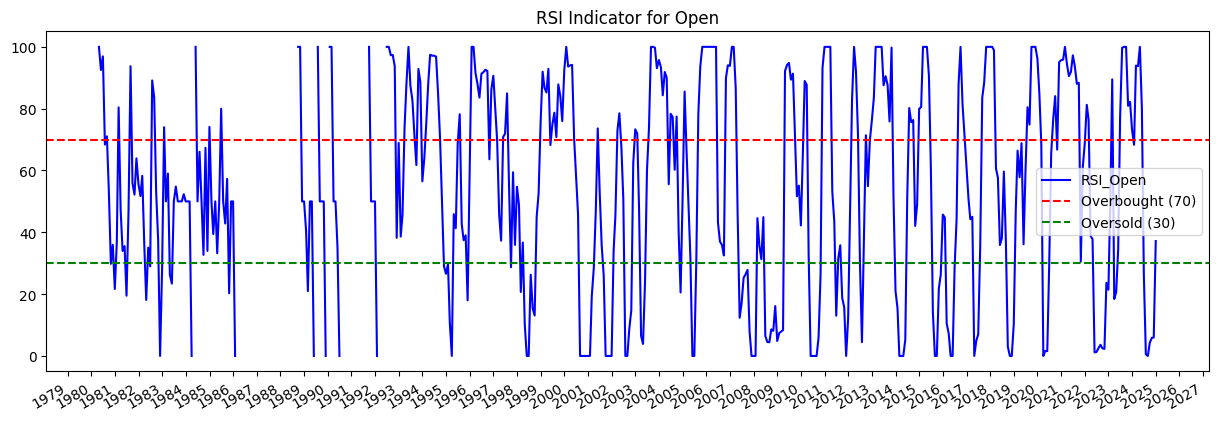

In [ ]:
df_rsi_w = cal_RSI(data_monthly, 4)

## Kiểm tra trend, tính mùa vụ, tính chu kỳ


### Kiểm tra trend

### Kiểm tra tính mùa vụ

### kiểm tra tính chu kỳ

## Kiểm tra tính dừng

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_adfuller_stationary(data):
    df = data.copy()
    for column in np.array(df.columns):
        if column != 'Date':
            result = adfuller(df[column])
            print(f"{column} 's ADF Statistic: {result[0]}")
            print(f"p-value: {result[1]}")
            if result[1] < 0.05:
                print(f"{column} : Chuỗi dừng (Stationary)")
            else:
                print(f"{column} : Chuỗi không dừng (Non-Stationary)")
            print('\n')
test_adfuller_stationary(df)

Adj Close 's ADF Statistic: -0.26648889253908453
p-value: 0.9301182370222743
Adj Close : Chuỗi không dừng (Non-Stationary)


Close 's ADF Statistic: -0.6954673925115284
p-value: 0.8479200946113239
Close : Chuỗi không dừng (Non-Stationary)


High 's ADF Statistic: -0.6810540182878081
p-value: 0.8515961318918457
High : Chuỗi không dừng (Non-Stationary)


Low 's ADF Statistic: -0.6603161305007964
p-value: 0.8567625887589183
Low : Chuỗi không dừng (Non-Stationary)


Open 's ADF Statistic: -0.5680386764385374
p-value: 0.8780416793929915
Open : Chuỗi không dừng (Non-Stationary)


Volume 's ADF Statistic: -3.2629633526516684
p-value: 0.016617393659278907
Volume : Chuỗi dừng (Stationary)




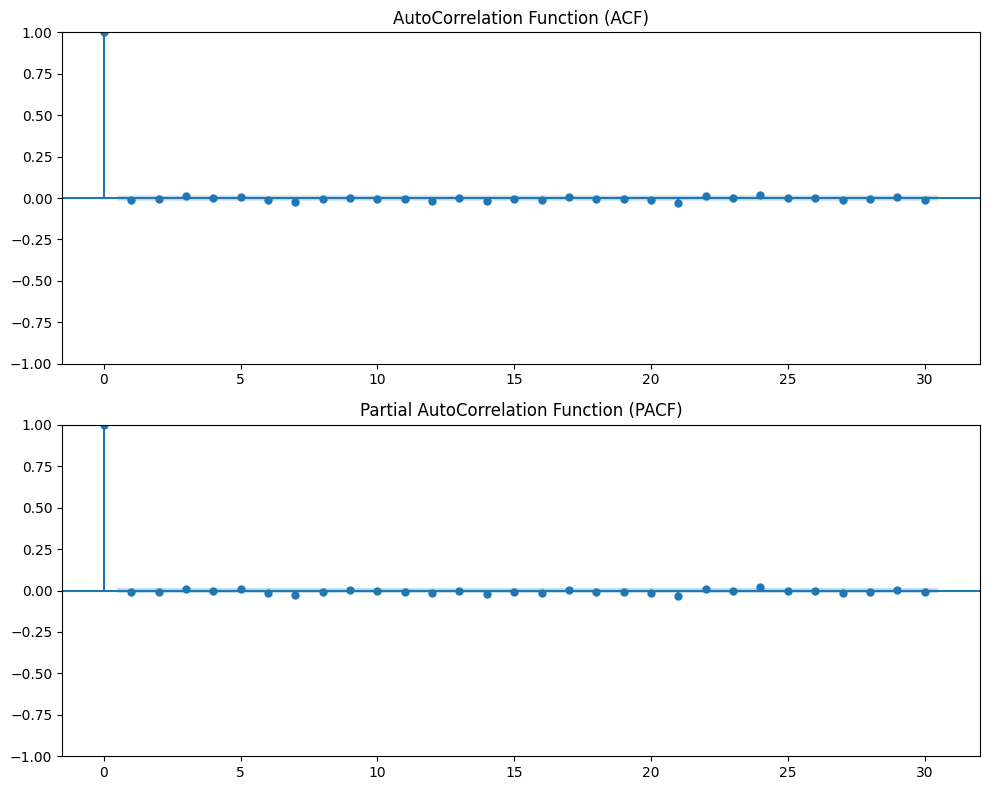

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Vẽ ACF và PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))


# ACF plot
sm.graphics.tsa.plot_acf(np.diff(df['Close']), lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title("AutoCorrelation Function (ACF)")

# PACF plot
sm.graphics.tsa.plot_pacf(np.diff(df['Close']), lags=30, ax=axes[1], alpha=0.05)
axes[1].set_title("Partial AutoCorrelation Function (PACF)")

plt.tight_layout()
plt.show()


## Model Sarimax

## Model ARIMA

## Model XGBoost


### model xgboost v2

## recursive

#test

# dự báo theo trung bình tuần

# xgboost + xgboost dự đoán sai số chưa có gridsearch

# có gridsearch

# test

# test 2